In [2]:
from binance.client import Client
import pandas as pd
from datetime import datetime
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
# binance trial key
api_key = '3x1g9GeEGc8QFwRPbXPtmhpL5G6dFIhOsf4P8TG3mptnNXptIhIdytYAGU9PH9KH'
api_secret = 'ApKGT7B7gMyOTrAeUEXKl5WtSMCd1hm4Qy5ngVcwean1zXJryCbaXNe6heoInhU1'
client = Client(api_key,api_secret)

import statistics

In [189]:
info = client.futures_exchange_info()
info

{'timezone': 'UTC',
 'serverTime': 1667635247230,
 'futuresType': 'U_MARGINED',
 'rateLimits': [{'rateLimitType': 'REQUEST_WEIGHT',
   'interval': 'MINUTE',
   'intervalNum': 1,
   'limit': 2400},
  {'rateLimitType': 'ORDERS',
   'interval': 'MINUTE',
   'intervalNum': 1,
   'limit': 1200},
  {'rateLimitType': 'ORDERS',
   'interval': 'SECOND',
   'intervalNum': 10,
   'limit': 300}],
 'exchangeFilters': [],
 'assets': [{'asset': 'USDT',
   'marginAvailable': True,
   'autoAssetExchange': '-10000'},
  {'asset': 'BTC',
   'marginAvailable': True,
   'autoAssetExchange': '-0.00100000'},
  {'asset': 'BNB', 'marginAvailable': True, 'autoAssetExchange': '-10'},
  {'asset': 'ETH', 'marginAvailable': True, 'autoAssetExchange': '-5'},
  {'asset': 'XRP', 'marginAvailable': True, 'autoAssetExchange': '0'},
  {'asset': 'ADA', 'marginAvailable': True, 'autoAssetExchange': '0'},
  {'asset': 'DOT', 'marginAvailable': True, 'autoAssetExchange': '0'},
  {'asset': 'SOL', 'marginAvailable': True, 'autoA

In [190]:
prices = client.get_all_tickers()

# Download data

In [191]:
start_date = "01 Jan, 2020"
end_date = "31 Oct, 2022"
interval = Client.KLINE_INTERVAL_5MINUTE #1DAY
# for more available interval: https://python-binance.readthedocs.io/en/latest/constants.html
symbols = ['BTCUSDT','ETHUSDT','UNIUSDT','SOLUSDT','APEUSDT','MANAUSDT','XMRUSDT','DOTUSDT','BCHUSDT','ADAUSDT','BNBUSDT']#
# symbols = [i.get('symbol') for i in client.get_all_tickers()]

In [192]:
%%time
df = pd.DataFrame()
for sym in symbols:
    print(f"running klines for {sym}")
    klines = client.get_historical_klines(sym,interval,start_date,end_date,)
    temp = pd.DataFrame(klines).iloc[:,:-1]
    temp = temp.astype(float)
    temp['symbol'] = sym
    df = df.append(temp)

running klines for BTCUSDT
running klines for ETHUSDT
running klines for UNIUSDT
running klines for SOLUSDT
running klines for APEUSDT
running klines for MANAUSDT
running klines for XMRUSDT
running klines for DOTUSDT
running klines for BCHUSDT
running klines for ADAUSDT
running klines for BNBUSDT
CPU times: total: 40.4 s
Wall time: 24min 15s


In [193]:
# clean raw df
col = ['open_time','open','high','low','close','volume','close_time','asset_volume',
       'num_trades','taker_base_volume','taker_quote_volume','symbol']
df.columns=col
df['open_time'] = df['open_time'].apply(lambda x: datetime.fromtimestamp(x/1000.0)) #get rid of millisecond
df['close_time'] = df['close_time'].apply(lambda x: datetime.fromtimestamp(x/1000.0))
df.head()

,open_time,open,high,low,close,volume,close_time,asset_volume,num_trades,taker_base_volume,taker_quote_volume,symbol
0,2020-01-01 08:00:00,7195.24,7196.25,7178.64,7179.78,95.509133,2020-01-01 08:04:59.999,686317.136252,1127.0,32.773245,235537.295045,BTCUSDT
1,2020-01-01 08:05:00,7179.76,7191.77,7178.20,7191.07,59.365225,2020-01-01 08:09:59.999,426481.260364,631.0,24.766513,177935.618201,BTCUSDT
2,2020-01-01 08:10:00,7193.15,7193.53,7180.24,7180.97,48.068510,2020-01-01 08:14:59.999,345446.503019,694.0,19.422283,139596.621683,BTCUSDT
3,2020-01-01 08:15:00,7180.97,7186.40,7177.35,7178.29,32.192929,2020-01-01 08:19:59.999,231162.555424,576.0,12.963258,93091.433276,BTCUSDT
4,2020-01-01 08:20:00,7177.71,7182.46,7175.47,7176.96,49.027397,2020-01-01 08:24:59.999,351927.893881,710.0,22.819744,163817.881155,BTCUSDT


In [198]:
start_date = "01 Jan, 2020"
end_date = "31 Oct, 2022"
interval = Client.KLINE_INTERVAL_5MINUTE #1DAY
# for more available interval: https://python-binance.readthedocs.io/en/latest/constants.html
symbols = ['BTCUSDT','ETHUSDT','UNIUSDT','SOLUSDT','APEUSDT','MANAUSDT','XMRUSDT','DOTUSDT','BCHUSDT','ADAUSDT','BNBUSDT']#
# symbols = [i.get('symbol') for i in client.get_all_tickers()]

In [199]:
%%time
df_future = pd.DataFrame()
for sym in symbols:
    print(f"running klines for {sym}")
    r = client.futures_historical_klines(sym,interval,start_date,end_date,)
    temp = pd.DataFrame(r).iloc[:,:-1]
    temp = temp.astype(float)
    temp['symbol'] = sym
    df_future = df_future.append(temp)

running klines for BTCUSDT
running klines for ETHUSDT
running klines for UNIUSDT
running klines for SOLUSDT
running klines for APEUSDT
running klines for MANAUSDT
running klines for XMRUSDT
running klines for DOTUSDT
running klines for BCHUSDT
running klines for ADAUSDT
running klines for BNBUSDT
CPU times: total: 49 s
Wall time: 39min 20s


In [200]:
# clean raw df
col = ['open_time','open','high','low','close','volume','close_time','asset_volume',
       'num_trades','taker_base_volume','taker_quote_volume','symbol']
df_future.columns=col
df_future['open_time'] = df_future['open_time'].apply(lambda x: datetime.fromtimestamp(x/1000.0)) #get rid of millisecond
df_future['close_time'] = df_future['close_time'].apply(lambda x: datetime.fromtimestamp(x/1000.0))
df_future.head()

,open_time,open,high,low,close,volume,close_time,asset_volume,num_trades,taker_base_volume,taker_quote_volume,symbol
0,2020-01-01 08:00:00,7189.43,7190.52,7172.94,7175.25,583.119,2020-01-01 08:04:59.999,4.186536e+06,921.0,175.877,1.262598e+06,BTCUSDT
1,2020-01-01 08:05:00,7174.71,7186.69,7173.28,7186.69,163.860,2020-01-01 08:09:59.999,1.176440e+06,345.0,127.400,9.147206e+05,BTCUSDT
2,2020-01-01 08:10:00,7186.83,7188.10,7175.70,7176.26,290.358,2020-01-01 08:14:59.999,2.084984e+06,294.0,80.474,5.777864e+05,BTCUSDT
3,2020-01-01 08:15:00,7176.22,7179.41,7172.43,7173.68,189.617,2020-01-01 08:19:59.999,1.360585e+06,326.0,69.584,4.992924e+05,BTCUSDT
4,2020-01-01 08:20:00,7173.50,7176.13,7170.69,7171.81,198.838,2020-01-01 08:24:59.999,1.426225e+06,365.0,46.168,3.311762e+05,BTCUSDT


In [201]:
df.to_csv('spot.csv')
df_future.to_csv('future.csv')

In [202]:
# get funding rate

df_funding = pd.DataFrame()
for sym in symbols:
    r = client.futures_funding_rate(symbol=sym,startTime=int(datetime.timestamp(datetime(2020, 1, 1, 0, 0, 0, 0))*1000)
                                    ,endTime=int(datetime.timestamp(datetime(2020, 7, 1, 0, 0, 0, 0))*1000),limit=1000)
    temp = pd.DataFrame(r).iloc[:,:]
    #temp = temp.astype(float)
    df_funding = df_funding.append(temp)

    r = client.futures_funding_rate(symbol=sym,startTime=int(datetime.timestamp(datetime(2020, 7, 1, 0, 0, 0, 0))*1000)
                                    ,endTime=int(datetime.timestamp(datetime(2021, 1, 1, 0, 0, 0, 0))*1000),limit=1000)
    temp = pd.DataFrame(r).iloc[:,:]
    #temp = temp.astype(float)
    df_funding = df_funding.append(temp)

    r = client.futures_funding_rate(symbol=sym,startTime=int(datetime.timestamp(datetime(2021, 1, 1, 0, 0, 0, 0))*1000)
                                    ,endTime=int(datetime.timestamp(datetime(2021, 7, 1, 0, 0, 0, 0))*1000),limit=1000)
    temp = pd.DataFrame(r).iloc[:,:]
    #temp = temp.astype(float)
    df_funding = df_funding.append(temp)

    r = client.futures_funding_rate(symbol=sym,startTime=int(datetime.timestamp(datetime(2021, 7, 1, 0, 0, 0, 0))*1000)
                                    ,endTime=int(datetime.timestamp(datetime(2022, 1, 1, 0, 0, 0, 0))*1000),limit=1000)
    temp = pd.DataFrame(r).iloc[:,:]
    #temp = temp.astype(float)
    df_funding = df_funding.append(temp)

    r = client.futures_funding_rate(symbol=sym,startTime=int(datetime.timestamp(datetime(2022, 1, 1, 0, 0, 0, 0))*1000)
                                    ,endTime=int(datetime.timestamp(datetime(2022, 7, 1, 0, 0, 0, 0))*1000),limit=1000)
    temp = pd.DataFrame(r).iloc[:,:]
    #temp = temp.astype(float)
    df_funding = df_funding.append(temp)

    r = client.futures_funding_rate(symbol=sym,startTime=int(datetime.timestamp(datetime(2022, 7, 1, 0, 0, 0, 0))*1000)
                                    ,endTime=int(datetime.timestamp(datetime(2023, 1, 1, 0, 0, 0, 0))*1000),limit=1000)
    temp = pd.DataFrame(r).iloc[:,:]
    #temp = temp.astype(float)
    df_funding = df_funding.append(temp)
    
    

df_funding=df_funding.drop_duplicates()

In [203]:
df_funding['fundingTime'] = df_funding['fundingTime'].apply(lambda x: datetime.fromtimestamp(x/1000.0))
df_funding

,symbol,fundingTime,fundingRate
0,BTCUSDT,2020-01-01 00:00:00.000,-0.00002403
1,BTCUSDT,2020-01-01 08:00:00.000,-0.00012359
2,BTCUSDT,2020-01-01 16:00:00.000,-0.00012383
3,BTCUSDT,2020-01-02 00:00:00.000,-0.00009664
4,BTCUSDT,2020-01-02 08:00:00.002,0.00003662
...,...,...,...
379,BNBUSDT,2022-11-04 08:00:00.000,-0.00026514
380,BNBUSDT,2022-11-04 16:00:00.004,-0.00015694
381,BNBUSDT,2022-11-05 00:00:00.020,0.00000000
382,BNBUSDT,2022-11-05 08:00:00.009,-0.00011505


In [204]:
df_funding.to_csv('funding.csv')

# preminiary back testing

In [205]:
df=pd.read_csv('spot.csv')
df_future=pd.read_csv('future.csv')
df_funding=pd.read_csv('funding.csv')

In [206]:
df.symbol.value_counts()

BTCUSDT     297343
ETHUSDT     297343
XMRUSDT     297343
BCHUSDT     297343
ADAUSDT     297343
BNBUSDT     297343
MANAUSDT    234618
SOLUSDT     233226
DOTUSDT     231006
UNIUSDT     222606
APEUSDT      65491
Name: symbol, dtype: int64

In [207]:
df_future.symbol.value_counts()

BTCUSDT     297793
ETHUSDT     297793
BCHUSDT     297793
ADAUSDT     289057
XMRUSDT     288193
BNBUSDT     286177
DOTUSDT     230317
SOLUSDT     223693
UNIUSDT     222541
MANAUSDT    171277
APEUSDT      65485
Name: symbol, dtype: int64

In [208]:
for sym in df.symbol.unique():
    print(sym)

BTCUSDT
ETHUSDT
UNIUSDT
SOLUSDT
APEUSDT
MANAUSDT
XMRUSDT
DOTUSDT
BCHUSDT
ADAUSDT
BNBUSDT


In [10]:
sym='BTCUSDT'

In [11]:
spot=df[df['symbol'] == sym][['close_time','close']]
spot.columns=['close_time','spot']
future=df_future[df_future['symbol'] == sym][['close_time','close']]
future.columns=['close_time','future']

funding=df_funding[df_funding['symbol'] == sym] 

testdata = future.merge(spot, on=['close_time'], how='inner')
testdata['spread'] = (testdata['future']-testdata['spot'])/testdata['spot']

In [12]:
testdata['std'] = testdata['spread'].rolling(20).std(ddof=0)
testdata['MA-TP'] = testdata['spread'].rolling(20).mean()

testdata['BOLU'] = testdata['MA-TP'] + 2*testdata['std']
testdata['BOLD'] = testdata['MA-TP'] - 2*testdata['std']

In [9]:
testdata

,close_time,future,spot,spread,std,MA-TP,BOLU,BOLD
0,2020-01-01 08:04:59.999,7175.25,7179.78,-0.000631,NaN,NaN,NaN,NaN
1,2020-01-01 08:09:59.999,7186.69,7191.07,-0.000609,NaN,NaN,NaN,NaN
2,2020-01-01 08:14:59.999,7176.26,7180.97,-0.000656,NaN,NaN,NaN,NaN
3,2020-01-01 08:19:59.999,7173.68,7178.29,-0.000642,NaN,NaN,NaN,NaN
4,2020-01-01 08:24:59.999,7171.81,7176.96,-0.000718,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
261907,2022-06-30 07:44:59.999,20076.30,20084.13,-0.000390,0.000091,-0.000512,-0.000329,-0.000695
261908,2022-06-30 07:49:59.999,20092.00,20104.68,-0.000631,0.000093,-0.000513,-0.000327,-0.000699
261909,2022-06-30 07:54:59.999,20094.10,20104.78,-0.000531,0.000088,-0.000507,-0.000332,-0.000683
261910,2022-06-30 07:59:59.999,20109.90,20123.01,-0.000651,0.000091,-0.000518,-0.000336,-0.000701


In [798]:
print(testdata.shape)

(194617, 8)


In [799]:
%%time
state = ""
entry_spread = 0.002
exit_spread = -0.000

entry2_spread = -0.002
exit2_spread = 0.000
action=[]
funding_pnl=0
funding_cnt=0
for i in range(testdata.shape[0]):
    # print(dict(testdata.iloc[i]))
    close_time = testdata.iloc[i]['close_time']
    future = testdata.iloc[i]['future']
    spot = testdata.iloc[i]['spot']
    spread = testdata.iloc[i]['spread']
    
    funding_action = funding[funding['fundingTime']==
        datetime.fromtimestamp(datetime.timestamp(datetime.strptime(testdata.iloc[i]['close_time'][:19],"%Y-%m-%d %H:%M:%S"))+1).strftime("%Y-%m-%d %H:%M:%S")+'.000']

    if spread > entry_spread:
        isEntry=True
    else:isEntry=False
    if spread < exit_spread:
        isExit=True
    else:isExit=False
        
    if spread < entry2_spread:
        isEntry2=True
    else:isEntry2=False
    if spread > exit2_spread:
        isExit2=True
    else:isExit2=False
        
    # exit position
    if state=="Entry" and isExit:
        state=""
        sellspot=spotEntry*spot-1000000
        exitfuture=(1/futureEntry-1/future)*-1*1000000*spot
        exitSpotFee = 0.00075*sellspot*spot
        exitFutureFee = 0.0004*1000000
        
        action.append(["Exit",close_time,spot,future,spread,
                       sellspot+exitfuture-entrySpotFee-entryFutureFee-exitSpotFee-exitFutureFee + funding_pnl, #
                       funding_cnt,funding_pnl])
        #reset funding pnl when exit
        funding_pnl=0
        funding_cnt=0
        print(action[-1])
    if state=="Entry2" and isExit2:
        state=""
        sellspot=1000000-spotEntry*spot
        exitfuture=(1/futureEntry-1/future)*1000000*spot
        exitSpotFee = 0.00075*sellspot*spot
        exitFutureFee = 0.0004*1000000
        
        action.append(["Exit2",close_time,spot,future,spread, #
                       sellspot+exitfuture-entrySpotFee-entryFutureFee-exitSpotFee-exitFutureFee + funding_pnl,
                       funding_cnt,funding_pnl])
        #reset funding pnl when exit
        funding_pnl=0
        funding_cnt=0
        print(action[-1])
        
    # enter long spot & short future
    if state=="" and isEntry:
        state="Entry"
        spotEntry = 1000000/spot
        futureEntry = future
        entrySpotFee = 0.00075*1000000
        entryFutureFee = 0.0004*1000000
        
        action.append(["Entry",close_time,spot,future,spread,1000000,0,0])
        print(action[-1])
    
    # enter short spot & long future
    if state=="" and isEntry2:
        state="Entry2"
        spotEntry = 1000000/spot
        futureEntry = future
        entrySpotFee = 0.00075*1000000
        entryFutureFee = 0.0004*1000000
        
        action.append(["Entry2",close_time,spot,future,spread,1000000,0,0])
        print(action[-1])
    
    
    
    if state!="":
        if funding_action.shape[0]==1 and state=="Entry":
            funding_cnt+=1
            funding_pnl+=spot * funding_action.iloc[0]['fundingRate'] * spotEntry #mark
            print("funding payment",close_time,funding_action.iloc[0]['fundingRate'],spot * funding_action.iloc[0]['fundingRate'] * spotEntry)
        if funding_action.shape[0]==1 and state=="Entry2":
            funding_cnt+=1
            funding_pnl+=spot * -1 * funding_action.iloc[0]['fundingRate'] * spotEntry #mark
            print("funding payment",close_time,funding_action.iloc[0]['fundingRate'],spot * -1 * funding_action.iloc[0]['fundingRate'] * spotEntry)
    
    #if len(action)==4:break
    
        

['Entry', '2020-08-22 15:04:59.999', 2.9816, 3.189, 0.06955996780252223, 1000000, 0, 0]
['Exit', '2020-08-22 15:24:59.999', 3.4101, 3.405, -0.0014955573150347804, 74222.71625577097, 0, 0]
['Entry2', '2020-08-22 15:29:59.999', 3.3793, 3.359, -0.00600716124641204, 1000000, 0, 0]
['Exit2', '2020-08-22 15:59:59.999', 3.41, 3.423, 0.0038123167155424925, 8353.020212427175, 0, 0]
['Entry', '2020-08-22 15:59:59.999', 3.41, 3.423, 0.0038123167155424925, 1000000, 0, 0]
funding payment 2020-08-22 15:59:59.999 0.00152252 1522.52
['Exit', '2020-08-22 16:09:59.999', 3.4104, 3.41, -0.00011728829462818318, 3888.0177241241668, 1, 1522.52]
['Entry', '2020-08-22 16:19:59.999', 3.382, 3.413, 0.009166173861620252, 1000000, 0, 0]
['Exit', '2020-08-22 16:29:59.999', 3.3877, 3.386, -0.0005018153909732369, 8049.029834073215, 0, 0]
['Entry', '2020-08-22 16:34:59.999', 3.511, 3.55, 0.011107946454001623, 1000000, 0, 0]
['Exit', '2020-08-22 16:54:59.999', 3.7287, 3.727, -0.0004559229758360916, 10526.725666854793, 

['Exit', '2020-08-28 11:34:59.999', 5.7632, 5.763, -3.4702942809623484e-05, 1293.0251894765686, 0, 0]
['Entry', '2020-08-28 11:54:59.999', 5.881, 5.895, 0.002380547525930853, 1000000, 0, 0]
['Exit', '2020-08-28 23:09:59.999', 6.236, 6.234, -0.0003207184092366549, 1243.8001915803159, 0, 0]
['Entry', '2020-08-28 23:54:59.999', 6.2531, 6.266, 0.002062976763525313, 1000000, 0, 0]
funding payment 2020-08-28 23:59:59.999 0.00031897 318.7812633733668
['Exit', '2020-08-29 07:59:59.999', 6.1812, 6.179, -0.000355917944735539, 1168.5074208567019, 1, 318.7812633733668]
['Entry', '2020-08-29 08:09:59.999', 6.1852, 6.202, 0.002716161158895416, 1000000, 0, 0]
['Exit', '2020-08-30 03:49:59.999', 6.295, 6.294, -0.000158856235107281, 1352.4578722556291, 0, 0]
['Entry', '2020-08-30 03:54:59.999', 6.3396, 6.356, 0.0025869140008833317, 1000000, 0, 0]
funding payment 2020-08-30 07:59:59.999 0.00159891 1546.8790937914066
funding payment 2020-08-30 15:59:59.999 0.00185894 1741.6493191999498
funding payment 20

['Entry', '2020-09-06 23:49:59.999', 4.4948, 4.505, 0.0022692889561271266, 1000000, 0, 0]
['Exit', '2020-09-06 23:54:59.999', 4.6333, 4.633, -6.474866725663976e-05, 825.5599183049412, 0, 0]
['Entry', '2020-09-07 10:39:59.999', 4.6236, 4.633, 0.0020330478415088453, 1000000, 0, 0]
['Exit', '2020-09-07 11:14:59.999', 4.6094, 4.609, -8.677919035014448e-05, 561.781837671063, 0, 0]
['Entry', '2020-09-07 13:14:59.999', 4.4263, 4.437, 0.002417368908569218, 1000000, 0, 0]
['Exit', '2020-09-07 13:19:59.999', 4.3734, 4.373, -9.146202039602047e-05, 933.1521745733592, 0, 0]
['Entry', '2020-09-07 17:24:59.999', 4.4089, 4.418, 0.002064006895143938, 1000000, 0, 0]
['Exit', '2020-09-07 17:39:59.999', 4.4542, 4.454, -4.490144133636165e-05, 568.1163112820116, 0, 0]
['Entry', '2020-09-07 18:39:59.999', 4.3425, 4.352, 0.0021876799078871766, 1000000, 0, 0]
['Exit', '2020-09-07 20:19:59.999', 4.1987, 4.196, -0.0006430561840569521, 1228.9243763930253, 0, 0]
['Entry', '2020-09-07 20:34:59.999', 4.0883, 4.097, 

['Exit', '2020-09-15 07:09:59.999', 5.3508, 5.348, -0.0005232862375718943, 2212.9262887928885, 1, 365.2919122257053]
['Entry', '2020-09-15 07:49:59.999', 5.3319, 5.344, 0.0022693598904706055, 1000000, 0, 0]
funding payment 2020-09-15 07:59:59.999 0.00022414 225.13208612314563
['Exit', '2020-09-15 13:29:59.999', 5.2601, 5.26, -1.9011045417512045e-05, 937.9743621469133, 1, 225.13208612314563]
['Entry', '2020-09-15 18:49:59.999', 5.395, 5.406, 0.002038924930491218, 1000000, 0, 0]
['Exit', '2020-09-16 09:44:59.999', 5.0644, 5.064, -7.898270278808071e-05, 485.0353657835433, 0, 0]
['Entry', '2020-09-16 09:59:59.999', 5.1428, 5.154, 0.002177801975577439, 1000000, 0, 0]
funding payment 2020-09-16 15:59:59.999 0.0001 101.93474371937467
['Exit', '2020-09-16 21:09:59.999', 5.127, 5.126, -0.0001950458357712982, 915.7160562045087, 1, 101.93474371937467]
['Entry', '2020-09-16 21:44:59.999', 5.0517, 5.062, 0.002038917592097705, 1000000, 0, 0]
['Exit', '2020-09-16 23:04:59.999', 5.0903, 5.09, -5.89356

['Exit', '2020-11-21 12:24:59.999', 5.1854, 5.184, -0.00026998881474898787, 1784.6759744710243, 2, 416.6863134558299]
['Entry', '2020-11-21 20:49:59.999', 5.3087, 5.32, 0.002128581385273289, 1000000, 0, 0]
funding payment 2020-11-22 15:59:59.999 0.00050574 526.7176306817112
funding payment 2020-11-22 23:59:59.999 0.00034311 351.31821858458756
funding payment 2020-11-23 15:59:59.999 0.00069174 741.4375975285853
funding payment 2020-11-24 07:59:59.999 0.00081341 905.4351749015767
funding payment 2020-11-24 15:59:59.999 0.00154297 1728.0845464991428
['Exit', '2020-11-25 12:59:59.999', 5.4383, 5.437, -0.00023904528988831709, 5099.700360529269, 5, 4252.993168195604]
['Entry', '2020-11-25 16:39:59.999', 5.6082, 5.62, 0.0021040619093470334, 1000000, 0, 0]
['Exit', '2020-11-26 07:19:59.999', 5.1656, 5.161, -0.0008905064271335034, 1334.4301431547347, 0, 0]
['Entry2', '2020-11-26 11:29:59.999', 4.9222, 4.91, -0.002478566494656858, 1000000, 0, 0]
['Exit2', '2020-11-26 11:44:59.999', 5.0063, 5.011

['Entry', '2021-01-16 19:29:59.999', 16.3363, 16.376, 0.0024301708465197043, 1000000, 0, 0]
['Exit', '2021-01-16 19:34:59.999', 16.4232, 16.42, -0.00019484631496904668, 1078.0699530732668, 0, 0]
['Entry', '2021-01-16 20:29:59.999', 16.1289, 16.176, 0.0029202239458361577, 1000000, 0, 0]
['Exit', '2021-01-16 22:29:59.999', 16.677, 16.675, -0.0001199256460993519, 1555.1217382967486, 0, 0]
['Entry2', '2021-01-16 23:04:59.999', 18.0004, 17.945, -0.0030777093842358385, 1000000, 0, 0]
['Exit2', '2021-01-16 23:24:59.999', 17.5475, 17.559, 0.0006553640119676091, 2095.599368640153, 0, 0]
['Entry', '2021-01-16 23:44:59.999', 17.356, 17.395, 0.0022470615349157595, 1000000, 0, 0]
funding payment 2021-01-16 23:59:59.999 0.00029398 297.08308458170086
['Exit', '2021-01-17 01:34:59.999', 17.5826, 17.574, -0.0004891199253806445, 1497.9458005601077, 1, 297.08308458170086]
['Entry', '2021-01-17 04:29:59.999', 18.9971, 19.055, 0.003047833616709922, 1000000, 0, 0]
['Exit', '2021-01-17 05:19:59.999', 18.1989

funding payment 2021-02-12 15:59:59.999 0.00134348 1342.2923106084743
['Exit', '2021-02-12 22:39:59.999', 26.1352, 26.119, -0.0006198536839205869, 6868.640776592046, 3, 5471.9951753743235]
['Entry', '2021-02-12 23:24:59.999', 27.4349, 27.491, 0.0020448406956103614, 1000000, 0, 0]
funding payment 2021-02-12 23:59:59.999 0.002538 2626.6799951886096
funding payment 2021-02-13 23:59:59.999 0.00120121 1261.21161050341
funding payment 2021-02-14 15:59:59.999 0.00250157 2569.62827059694
funding payment 2021-02-15 07:59:59.999 0.00161388 1580.7904862784264
['Exit', '2021-02-15 10:24:59.999', 23.7116, 23.691, -0.0008687730899644785, 9223.345034049753, 4, 8038.310362567386]
['Entry', '2021-02-15 12:44:59.999', 24.6577, 24.711, 0.002161596580378548, 1000000, 0, 0]
['Exit', '2021-02-15 14:14:59.999', 25.8793, 25.879, -1.1592276452581825e-05, 688.2293712089929, 0, 0]
['Entry', '2021-02-15 16:24:59.999', 26.5509, 26.617, 0.002489557792767939, 1000000, 0, 0]
funding payment 2021-02-15 23:59:59.999 0.

['Entry', '2021-03-27 16:34:59.999', 32.5784, 32.645, 0.002044299290327367, 1000000, 0, 0]
funding payment 2021-03-28 07:59:59.999 0.00040727 407.39501227807375
funding payment 2021-03-28 15:59:59.999 0.00055815 564.9310503278246
funding payment 2021-03-29 15:59:59.999 0.00067724 693.8142778036981
funding payment 2021-03-29 23:59:59.999 0.00073383 770.5615945841415
funding payment 2021-03-31 07:59:59.999 0.00091032 949.4226510816983
funding payment 2021-03-31 15:59:59.999 0.00124134 1289.4185677626895
funding payment 2021-03-31 23:59:59.999 0.00105508 1186.8030706234804
funding payment 2021-04-02 07:59:59.999 0.00022301 256.4330234142867
funding payment 2021-04-02 15:59:59.999 0.00155414 1809.2022602092184
funding payment 2021-04-02 23:59:59.999 0.00172134 2106.5998841563733
funding payment 2021-04-03 15:59:59.999 0.00149258 2093.4806201655083
funding payment 2021-04-03 23:59:59.999 0.00191956 2535.6523578812953
funding payment 2021-04-04 07:59:59.999 0.00065183 827.9367852933232
fundi

['Entry', '2021-05-19 22:04:59.999', 24.332, 24.387, 0.0022603978300180716, 1000000, 0, 0]
['Exit', '2021-05-19 22:19:59.999', 24.452, 24.431, -0.0008588254539506296, 1572.2874278246077, 0, 0]
['Entry2', '2021-05-19 22:24:59.999', 25.58, 25.498, -0.003205629397967052, 1000000, 0, 0]
['Exit2', '2021-05-19 23:09:59.999', 26.976, 27.02, 0.001631079478054585, 3510.79857031419, 0, 0]
['Entry', '2021-05-19 23:34:59.999', 27.198, 27.269, 0.002610486065151774, 1000000, 0, 0]
['Exit', '2021-05-19 23:59:59.999', 26.989, 26.956, -0.0012227203675571991, 2263.6619459132376, 0, 0]
['Entry2', '2021-05-20 00:09:59.999', 26.275, 26.222, -0.0020171265461464234, 1000000, 0, 0]
['Exit2', '2021-05-20 00:14:59.999', 25.644, 25.648, 0.00015598190609894462, 560.6100757064198, 0, 0]
['Entry2', '2021-05-20 00:29:59.999', 26.794, 26.726, -0.0025378816152870566, 1000000, 0, 0]
['Exit2', '2021-05-20 02:09:59.999', 27.953, 27.988, 0.0012521017422101436, 2387.3745557593093, 0, 0]
['Entry2', '2021-05-20 03:54:59.999'

['Entry2', '2021-11-16 18:09:59.999', 39.53, 39.202, -0.00829749557298262, 1000000, 0, 0]
['Exit2', '2021-11-16 23:54:59.999', 42.04, 42.043, 7.136060894386569e-05, 7467.164247463499, 0, 0]
['Entry2', '2021-12-04 04:19:59.999', 32.83, 32.739, -0.002771855010661014, 1000000, 0, 0]
['Exit2', '2021-12-04 06:29:59.999', 33.71, 33.711, 2.96647878966974e-05, 1353.832422082976, 0, 0]
['Entry2', '2021-12-04 12:54:59.999', 30.34, 30.253, -0.0028675016479894444, 1000000, 0, 0]
['Exit2', '2021-12-04 15:49:59.999', 27.26, 27.262, 7.336757153334157e-05, 1031.0380841792564, 0, 0]
['Entry2', '2021-12-04 17:14:59.999', 28.18, 28.123, -0.0020227111426543154, 1000000, 0, 0]
funding payment 2021-12-04 23:59:59.999 -0.00030249 310.0039460610362
['Exit2', '2021-12-05 13:14:59.999', 28.58, 28.581, 3.498950314909805e-05, 861.2183617338376, 1, 310.0039460610362]
['Entry2', '2021-12-06 05:19:59.999', 27.34, 27.284, -0.0020482809070958645, 1000000, 0, 0]
['Exit2', '2021-12-06 09:49:59.999', 27.01, 27.014, 0.000

funding payment 2022-05-12 15:59:59.999 -0.0010921 1036.8525882352942
['Exit2', '2022-05-12 22:34:59.999', 8.39, 8.391, 0.00011918951132293751, 1924.2909361769964, 1, 1036.8525882352942]
['Entry2', '2022-05-13 00:29:59.999', 9.0, 8.981, -0.0021111111111111252, 1000000, 0, 0]
['Exit2', '2022-05-13 12:24:59.999', 9.55, 9.555, 0.0005235602094239795, 1263.982182096644, 0, 0]
['Entry2', '2022-05-13 14:39:59.999', 10.15, 10.129, -0.0020689655172414574, 1000000, 0, 0]
['Exit2', '2022-05-13 16:04:59.999', 10.04, 10.042, 0.00019920318725106257, 691.8216712816898, 0, 0]
['Entry2', '2022-05-13 17:14:59.999', 10.48, 10.457, -0.0021946564885495885, 1000000, 0, 0]
['Exit2', '2022-05-13 21:34:59.999', 11.16, 11.163, 0.00026881720430108546, 1109.6072673725027, 0, 0]
['Entry2', '2022-05-14 04:29:59.999', 10.88, 10.858, -0.0020220588235294336, 1000000, 0, 0]
funding payment 2022-05-14 07:59:59.999 -0.00012128 116.59823529411767
['Exit2', '2022-05-14 12:24:59.999', 10.45, 10.454, 0.0003827751196173527, 8

['Exit2', '2022-05-28 22:29:59.999', 9.41, 9.411, 0.00010626992561099317, 907.5138341984109, 0, 0]
['Entry', '2022-05-29 00:54:59.999', 9.44, 9.469, 0.0030720338983050758, 1000000, 0, 0]
['Exit', '2022-05-29 01:24:59.999', 9.39, 9.381, -0.0009584664536741576, 2459.762326933784, 0, 0]
['Entry2', '2022-05-29 02:24:59.999', 9.45, 9.429, -0.0022222222222221186, 1000000, 0, 0]
['Exit2', '2022-05-29 07:34:59.999', 9.7, 9.701, 0.00010309278350528064, 859.0147992709512, 0, 0]
['Entry2', '2022-05-29 14:59:59.999', 9.47, 9.451, -0.0020063357972545013, 1000000, 0, 0]
['Exit2', '2022-05-29 18:19:59.999', 9.54, 9.541, 0.0001048218029351386, 585.5840863079274, 0, 0]
['Entry2', '2022-05-29 18:54:59.999', 9.49, 9.47, -0.0021074815595363092, 1000000, 0, 0]
['Exit2', '2022-05-29 19:04:59.999', 9.57, 9.571, 0.00010449320794142588, 690.5405875979916, 0, 0]
['Entry2', '2022-05-29 20:39:59.999', 9.7, 9.68, -0.002061855670103049, 1000000, 0, 0]
['Exit2', '2022-05-29 23:44:59.999', 9.82, 9.823, 0.000305498981

['Exit2', '2022-06-10 15:44:59.999', 9.21, 9.213, 0.00032573289902262074, 1037.9799898800377, 0, 0]
['Entry2', '2022-06-10 17:34:59.999', 9.1, 9.081, -0.002087912087912102, 1000000, 0, 0]
['Exit2', '2022-06-11 05:24:59.999', 8.73, 8.731, 0.0001145475372278861, 541.2497488419395, 0, 0]
['Entry2', '2022-06-11 06:14:59.999', 8.78, 8.762, -0.0020501138952162762, 1000000, 0, 0]
['Exit2', '2022-06-11 07:59:59.999', 8.65, 8.652, 0.00023121387283224178, 693.9640180906842, 0, 0]
['Entry2', '2022-06-11 13:44:59.999', 8.75, 8.731, -0.002171428571428586, 1000000, 0, 0]
['Exit2', '2022-06-11 14:04:59.999', 8.72, 8.722, 0.00022935779816501048, 845.4266117106849, 0, 0]
['Entry2', '2022-06-11 14:44:59.999', 8.77, 8.752, -0.00205245153933853, 1000000, 0, 0]
['Exit2', '2022-06-11 16:19:59.999', 8.79, 8.792, 0.00022753128555183936, 740.552909385143, 0, 0]
['Entry2', '2022-06-11 17:09:59.999', 8.6, 8.582, -0.002093023255813826, 1000000, 0, 0]
['Exit2', '2022-06-11 17:29:59.999', 8.62, 8.621, 0.00011600928

['Exit2', '2022-06-17 23:29:59.999', 7.28, 7.281, 0.00013736263736256122, 652.0375085555629, 0, 0]
['Entry2', '2022-06-17 23:34:59.999', 7.26, 7.245, -0.0020661157024792947, 1000000, 0, 0]
funding payment 2022-06-17 23:59:59.999 -0.000567 570.904958677686
['Exit2', '2022-06-18 05:49:59.999', 7.34, 7.344, 0.000544959128065456, 1667.0393576602464, 1, 570.904958677686]
['Entry2', '2022-06-18 07:09:59.999', 7.3, 7.285, -0.0020547945205479016, 1000000, 0, 0]
['Exit2', '2022-06-18 07:24:59.999', 7.33, 7.332, 0.00027285129604362614, 793.3462031461306, 0, 0]
['Entry2', '2022-06-18 08:19:59.999', 7.41, 7.392, -0.0024291497975708226, 1000000, 0, 0]
['Exit2', '2022-06-18 12:49:59.999', 7.22, 7.223, 0.000415512465373977, 1218.736489870353, 0, 0]
['Entry2', '2022-06-18 13:44:59.999', 7.2, 7.184, -0.002222222222222224, 1000000, 0, 0]
['Exit2', '2022-06-19 00:24:59.999', 6.92, 6.921, 0.00014450867052027947, 705.8803916231384, 0, 0]
['Entry2', '2022-06-19 01:04:59.999', 6.86, 6.844, -0.002332361516034

['Entry2', '2022-06-25 03:34:59.999', 8.11, 8.093, -0.0020961775585696006, 1000000, 0, 0]
['Exit2', '2022-06-25 03:39:59.999', 8.11, 8.114, 0.0004932182490753806, 1043.5558535525101, 0, 0]
['Entry2', '2022-06-25 05:54:59.999', 8.21, 8.193, -0.0020706455542023427, 1000000, 0, 0]
['Exit2', '2022-06-25 06:04:59.999', 8.22, 8.223, 0.00036496350364964884, 893.2132326479975, 0, 0]
['Entry2', '2022-06-25 15:59:59.999', 8.28, 8.261, -0.00229468599033818, 1000000, 0, 0]
['Exit2', '2022-06-25 16:24:59.999', 8.25, 8.255, 0.0006060606060607008, 1344.60661080262, 0, 0]
['Entry2', '2022-06-25 18:29:59.999', 8.3, 8.28, -0.00240963855421703, 1000000, 0, 0]
['Exit2', '2022-06-25 18:54:59.999', 8.29, 8.293, 0.0003618817852834878, 1223.3960054811475, 0, 0]
['Entry2', '2022-06-25 19:19:59.999', 8.32, 8.303, -0.002043269230769166, 1000000, 0, 0]
['Exit2', '2022-06-25 19:39:59.999', 8.22, 8.223, 0.00036496350364964884, 828.6598519121133, 0, 0]
['Entry2', '2022-06-26 01:34:59.999', 7.98, 7.963, -0.0021303258

In [800]:
df_action = pd.DataFrame(action)
df_action.columns=['action','time','spot','future','spread','principle','funding_cnt','funding_pnl']
df_action.head()

df_action.to_csv('action_'+sym+'.csv')

# Preliminary Results analysis

In [7]:
df=pd.read_csv('spot.csv')
df_future=pd.read_csv('future.csv')
df_funding=pd.read_csv('funding.csv')

In [8]:
df.symbol.value_counts()

BTCUSDT     297343
ETHUSDT     297343
XMRUSDT     297343
BCHUSDT     297343
ADAUSDT     297343
BNBUSDT     297343
MANAUSDT    234618
SOLUSDT     233226
DOTUSDT     231006
UNIUSDT     222606
APEUSDT      65491
Name: symbol, dtype: int64

In [5]:
sym='DOTUSDT'

In [6]:
spot=df[df['symbol'] == sym][['close_time','close']]
spot.columns=['close_time','spot']
future=df_future[df_future['symbol'] == sym][['close_time','close']]
future.columns=['close_time','future']

funding=df_funding[df_funding['symbol'] == sym] 

testdata = future.merge(spot, on=['close_time'], how='inner')
testdata['spread'] = (testdata['future']-testdata['spot'])/testdata['spot']

In [807]:
testdata = future.merge(spot, on=['close_time'], how='inner')

In [808]:
testdata['spread'] = (testdata['future']-testdata['spot'])/testdata['spot']

In [809]:
print(sym)
p = [l[2] for l in testdata.values.tolist() if l[0][:4]=='2020']
print("BnH",(p[-1] - p[0])/p[0])
p = [l[2] for l in testdata.values.tolist() if l[0][:4]=='2021']
print("BnH",(p[-1] - p[0])/p[0])
p = [l[2] for l in testdata.values.tolist() if l[0][:4]=='2022']
print("BnH",(p[-1] - p[0])/p[0])

DOTUSDT
BnH 1.761738663804669
BnH 2.3968749238232214
BnH -0.747394897592526


In [810]:
testdata.head()

,close_time,future,spot,spread
0,2020-08-22 15:04:59.999,3.189,2.9816,0.069560
1,2020-08-22 15:09:59.999,3.125,3.0100,0.038206
2,2020-08-22 15:14:59.999,3.088,3.0690,0.006191
3,2020-08-22 15:19:59.999,3.177,3.1450,0.010175
4,2020-08-22 15:24:59.999,3.405,3.4101,-0.001496


In [811]:
df_action=pd.read_csv('action_'+sym+'.csv')
#df_action = df_action[:-1]

In [813]:
df_action

,Unnamed: 0,action,time,spot,future,spread,principle,funding_cnt,funding_pnl
0,0,Entry,2020-08-22 16:59:59.999,3.8003,3.850,0.013078,1000000.000000,0,0.0
1,1,Exit,2020-08-22 17:04:59.999,3.7202,3.718,-0.000591,11694.526281,0,0.0
2,2,Entry,2020-08-22 17:29:59.999,3.7054,3.759,0.014465,1000000.000000,0,0.0
3,3,Exit,2020-08-22 18:29:59.999,3.6726,3.659,-0.003703,16306.392074,0,0.0
4,4,Entry,2020-08-22 19:09:59.999,3.7100,3.743,0.008895,1000000.000000,0,0.0
...,...,...,...,...,...,...,...,...,...
7256,7256,Entry2,2022-06-30 02:44:59.999,7.1400,7.126,-0.001961,1000000.000000,0,0.0
7257,7257,Exit2,2022-06-30 04:39:59.999,7.0900,7.092,0.000282,677.634379,0,0.0
7258,7258,Entry,2022-06-30 05:44:59.999,7.1400,7.147,0.000980,1000000.000000,0,0.0
7259,7259,Exit,2022-06-30 05:49:59.999,7.1500,7.136,-0.001958,1391.636671,0,0.0


In [814]:
df_action[df_action['funding_pnl']<0]

,Unnamed: 0,action,time,spot,future,spread,principle,funding_cnt,funding_pnl
689,689,Exit,2020-10-05 08:04:59.999,4.1843,4.183,-0.000311,-212.433729,1,-149.464249
707,707,Exit2,2020-10-06 08:09:59.999,4.1627,4.164,0.000312,-499.523300,1,-99.846468
1103,1103,Exit2,2020-10-26 00:34:59.999,4.3118,4.312,0.000046,-575.791574,1,-98.822445
1313,1313,Exit2,2020-11-03 08:04:59.999,4.0244,4.027,0.000646,382.777165,1,-100.000000
1473,1473,Exit2,2020-11-11 08:04:59.999,4.4284,4.429,0.000135,-922.063971,1,-100.147172
...,...,...,...,...,...,...,...,...,...
6119,6119,Exit2,2022-02-25 14:54:59.999,16.1600,16.161,0.000062,120.393200,1,-17.826186
6171,6171,Exit2,2022-03-04 08:39:59.999,17.8500,17.851,0.000056,-252.327438,1,-24.416603
6377,6377,Exit2,2022-03-31 23:34:59.999,21.9000,21.903,0.000137,-403.593437,1,-7.899213
6561,6561,Exit2,2022-04-21 11:24:59.999,19.2700,19.271,0.000052,-440.806514,1,-36.712301


In [815]:
hold_time = [(l2[0][2][:4],l2[1][2][:4],datetime.strptime(l2[1][2][:19],"%Y-%m-%d %H:%M:%S") - datetime.strptime(l2[0][2][:19],"%Y-%m-%d %H:%M:%S"),l2[1][1]) for l2 in [df_action.values.tolist()[i:i+2] for i in range(0, df_action.shape[0], 2)]]
#hold_time


IndexError: list index out of range

SQN= Squareroot(N) * Average (of the N Profit&Loss) / Std dev (of the N Profit&Loss)

In [8]:
results = []
for sym in ["BTCUSDT","ETHUSDT","XMRUSDT","BCHUSDT","ADAUSDT","BNBUSDT","SOLUSDT","DOTUSDT"]:


    df_action=pd.read_csv('action_'+sym+'.csv')
    if (df_action.shape[0]%2)==1:
        df_action = df_action[:-1]
    hold_time = [(l2[0][2][:4],l2[1][2][:4],datetime.strptime(l2[1][2][:19],"%Y-%m-%d %H:%M:%S") - datetime.strptime(l2[0][2][:19],"%Y-%m-%d %H:%M:%S"),l2[1][1]) for l2 in [df_action.values.tolist()[i:i+2] for i in range(0, df_action.shape[0], 2)]]
    #hold_time

    if df_action[df_action.time.apply(lambda x:x[:4]=='2020')].shape[0]>0:
        datum=[]
        datum.append(sym)
        datum.append(2020)
        datum.append(len([l[6]-1000000 for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2020']))
        datum.append(100*sum([l[6] for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2020'])/1000000)
        datum.append(len([1 for l in df_action.values.tolist() if l[6]>0 and (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2020'])/len([1 for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2020']))
        datum.append(100*sum([l[8] for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2020'])/1000000)
        datum.append(statistics.fmean([l[7] for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2020']))
        datum.append(statistics.fmean([l[2].total_seconds() for l in hold_time if l[1]=='2020' and (l[3]=="Exit" or l[3]=="Exit2")])/60/60)
        results.append(datum)

    if df_action[df_action.time.apply(lambda x:x[:4]=='2021')].shape[0]>0:
        datum=[]
        datum.append(sym)
        datum.append(2021)
        datum.append(len([l[6]-1000000 for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2021']))
        datum.append(100*sum([l[6] for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2021'])/1000000)
        datum.append(len([1 for l in df_action.values.tolist() if l[6]>0 and (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2021'])/len([1 for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2021']))
        datum.append(100*sum([l[8] for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2021'])/1000000)
        datum.append(statistics.fmean([l[7] for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2021']))
        datum.append(statistics.fmean([l[2].total_seconds() for l in hold_time if l[1]=='2021' and (l[3]=="Exit" or l[3]=="Exit2")])/60/60)
        results.append(datum)

    if df_action[df_action.time.apply(lambda x:x[:4]=='2022')].shape[0]>0:
        datum=[]
        datum.append(sym)
        datum.append(2022)
        datum.append(len([l[6]-1000000 for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2022']))
        datum.append(100*sum([l[6] for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2022'])/1000000)
        datum.append(len([1 for l in df_action.values.tolist() if l[6]>0 and (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2022'])/len([1 for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2022']))
        datum.append(100*sum([l[8] for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2022'])/1000000)
        datum.append(statistics.fmean([l[7] for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2022']))
        datum.append(statistics.fmean([l[2].total_seconds() for l in hold_time if l[1]=='2022' and (l[3]=="Exit" or l[3]=="Exit2")])/60/60)
        results.append(datum)






In [9]:
results1 = pd.DataFrame(results)
results1.columns=['sym','year','number_of_enter','PNL','winpercent','PNLfunding','avg_cnt_funding','avg_hold_hours']
results1.to_csv("OriginalResults.csv")

# study gap

In [143]:
df=pd.read_csv('spot.csv')
df_future=pd.read_csv('future.csv')
df_funding=pd.read_csv('funding.csv')

In [144]:
df.symbol.value_counts()

BTCUSDT     261919
ETHUSDT     261919
XMRUSDT     261919
BCHUSDT     261919
ADAUSDT     261919
BNBUSDT     261919
MANAUSDT    199194
SOLUSDT     197802
DOTUSDT     195582
UNIUSDT     187182
APEUSDT      30067
Name: symbol, dtype: int64

In [145]:
sym='XMRUSDT'

In [146]:
spot=df[df['symbol'] == sym][['close_time','close']]
spot.columns=['close_time','spot']
future=df_future[df_future['symbol'] == sym][['close_time','close']]
future.columns=['close_time','future']

funding=df_funding[df_funding['symbol'] == sym] 
funding['fundingTime_t'] = funding['fundingTime'].apply(lambda x:datetime.strptime(x[:19],"%Y-%m-%d %H:%M:%S"))

testdata = future.merge(spot, on=['close_time'], how='inner')
testdata['spread'] = (testdata['future']-testdata['spot'])/testdata['spot']

In [147]:
testdata = future.merge(spot, on=['close_time'], how='inner')

In [148]:
testdata['spread'] = (testdata['future']-testdata['spot'])/testdata['spot']
testdata['spot_pct_change']=testdata['spot'].pct_change()

In [149]:
testdata['std'] = testdata['spread'].rolling(20).std(ddof=0)
testdata['MA-TP'] = testdata['spread'].rolling(20).mean()

testdata['BOLU'] = testdata['MA-TP'] + 2*testdata['std']
testdata['BOLD'] = testdata['MA-TP'] - 2*testdata['std']

In [150]:
def ct_tsf(t):
     return datetime.strptime(t[:19],"%Y-%m-%d %H:%M:%S")+timedelta(seconds=1)

def hour_rounder(t):
    t = datetime.strptime(t[:19],"%Y-%m-%d %H:%M:%S")+timedelta(seconds=1)
    if (t.hour*60+t.minute)%(60*8)==0:
        return t
    else:
        return (t+timedelta(minutes=60*8-(t.hour*60+t.minute)%(60*8)))
str(hour_rounder('2020-01-01 08:04:59.999'))


'2020-01-01 16:00:00'

In [151]:
testdata['funding_time_next']=testdata['close_time'].apply(lambda x:str(hour_rounder(x))+'.000')
testdata['close_time_t']=testdata['close_time'].apply(lambda x:ct_tsf(x))


In [152]:
testdata['year']=testdata['close_time'].apply(lambda x:x[:4])
testdata['month']=testdata['close_time'].apply(lambda x:x[5:7])
testdata['day']=testdata['close_time'].apply(lambda x:x[8:10])
testdata['period']=testdata['close_time'].apply(lambda x:(x[:4]+x[5:7]))
testdata['hours']=testdata['close_time'].apply(lambda x:(x[11:13]))
testdata['minutes']=testdata['close_time'].apply(lambda x:(x[14:16]))

In [153]:
testdata

,close_time,future,spot,spread,spot_pct_change,std,MA-TP,BOLU,BOLD,funding_time_next,close_time_t,year,month,day,period,hours,minutes
0,2020-02-03 16:04:59.999,75.90,75.82,0.001055,NaN,NaN,NaN,NaN,NaN,2020-02-04 00:00:00.000,2020-02-03 16:05:00,2020,02,03,202002,16,04
1,2020-02-03 16:09:59.999,76.10,76.09,0.000131,0.003561,NaN,NaN,NaN,NaN,2020-02-04 00:00:00.000,2020-02-03 16:10:00,2020,02,03,202002,16,09
2,2020-02-03 16:14:59.999,76.32,76.31,0.000131,0.002891,NaN,NaN,NaN,NaN,2020-02-04 00:00:00.000,2020-02-03 16:15:00,2020,02,03,202002,16,14
3,2020-02-03 16:19:59.999,76.55,76.54,0.000131,0.003014,NaN,NaN,NaN,NaN,2020-02-04 00:00:00.000,2020-02-03 16:20:00,2020,02,03,202002,16,19
4,2020-02-03 16:24:59.999,76.75,76.64,0.001435,0.001307,NaN,NaN,NaN,NaN,2020-02-04 00:00:00.000,2020-02-03 16:25:00,2020,02,03,202002,16,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252308,2022-06-30 07:44:59.999,118.44,118.60,-0.001349,0.000000,0.000657,-0.000434,0.000880,-0.001748,2022-06-30 08:00:00.000,2022-06-30 07:45:00,2022,06,30,202206,07,44
252309,2022-06-30 07:49:59.999,118.57,118.60,-0.000253,0.000000,0.000474,-0.000525,0.000423,-0.001473,2022-06-30 08:00:00.000,2022-06-30 07:50:00,2022,06,30,202206,07,49
252310,2022-06-30 07:54:59.999,118.37,118.20,0.001438,-0.003373,0.000631,-0.000453,0.000810,-0.001715,2022-06-30 08:00:00.000,2022-06-30 07:55:00,2022,06,30,202206,07,54
252311,2022-06-30 07:59:59.999,118.86,119.00,-0.001176,0.006768,0.000637,-0.000516,0.000759,-0.001791,2022-06-30 08:00:00.000,2022-06-30 08:00:00,2022,06,30,202206,07,59


Text(0.5, 1.0, 'XMRUSDT')

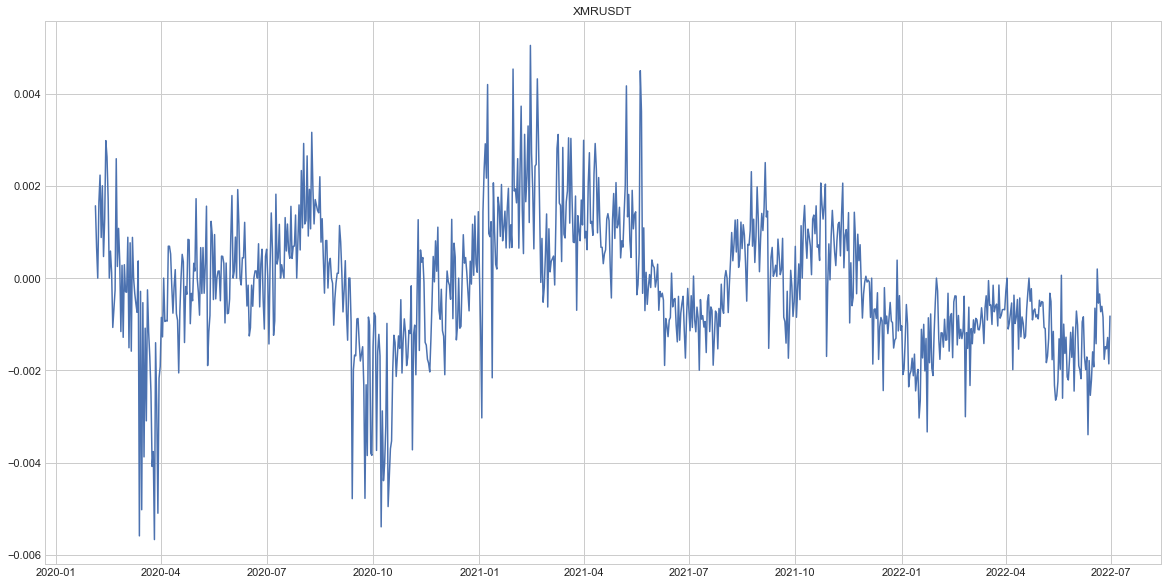

In [154]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
fig = plt.figure(figsize=(20,10))
ax = plt.axes()
x = np.linspace(0, 10, 1000)
ax.plot(testdata[testdata.close_time.apply(lambda x:x[11:13]+x[14:16])=='2359'].close_time_t,
        testdata[testdata.close_time.apply(lambda x:x[11:13]+x[14:16])=='2359'].spread);
plt.title(sym)

In [155]:
(testdata[['year','spread']].groupby(['year']).describe().to_clipboard()) 

[Text(0.5, 1.0, 'XMRUSDT')]

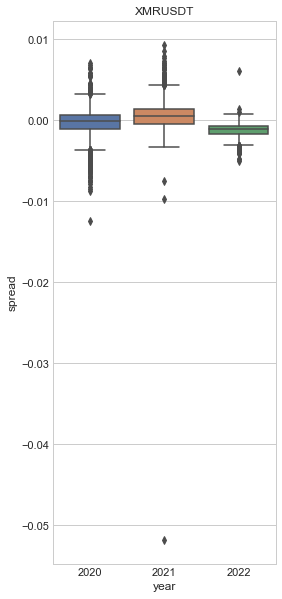

In [156]:
# import seaborn library
import seaborn as sns
from matplotlib import pyplot

a4_dims = (4, 10)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(x = testdata[testdata.minutes=='59']['year'],
            y = testdata[testdata.minutes=='59']['spread']).set(title=sym)

<Figure size 1440x720 with 0 Axes>

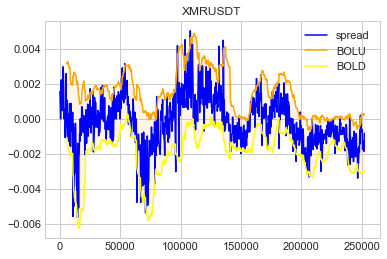

In [157]:
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
testdata_plt=testdata[testdata.close_time.apply(lambda x:x[11:13]+x[14:16])=='2359']

testdata_plt['std'] = testdata_plt['spread'].rolling(20).std(ddof=0)
testdata_plt['MA-TP'] = testdata_plt['spread'].rolling(20).mean()

testdata_plt['BOLU'] = testdata_plt['MA-TP'] + 2*testdata_plt['std']
testdata_plt['BOLD'] = testdata_plt['MA-TP'] - 2*testdata_plt['std']

ax = testdata_plt[['spread', 'BOLU', 'BOLD']].plot(color=['blue', 'orange', 'yellow'])
ax.fill_between(testdata_plt.index, testdata_plt['BOLD'], testdata_plt['BOLU'], facecolor='orange', alpha=0.1)

plt.title(sym)
plt.show()

In [28]:
print(sym)
p = [l[2] for l in testdata.values.tolist() if l[0][:4]=='2020']
print("BnH",(p[-1] - p[0])/p[0])
p = [l[2] for l in testdata.values.tolist() if l[0][:4]=='2021']
print("BnH",(p[-1] - p[0])/p[0])
p = [l[2] for l in testdata.values.tolist() if l[0][:4]=='2022']
print("BnH",(p[-1] - p[0])/p[0])

BTCUSDT
BnH 3.0070865681121153
BnH 0.6717808150482447
BnH -0.5800098758059021


In [46]:
testdata.head()

,close_time,future,spot,spread,spot_pct_change,std,MA-TP,BOLU,BOLD,funding_time_next,close_time_t,year,month,day,period,hours,minutes
0,2020-01-01 08:04:59.999,7175.25,7179.78,-0.000631,NaN,NaN,NaN,NaN,NaN,2020-01-01 16:00:00.000,2020-01-01 08:05:00,2020,01,01,202001,08,04
1,2020-01-01 08:09:59.999,7186.69,7191.07,-0.000609,0.001572,NaN,NaN,NaN,NaN,2020-01-01 16:00:00.000,2020-01-01 08:10:00,2020,01,01,202001,08,09
2,2020-01-01 08:14:59.999,7176.26,7180.97,-0.000656,-0.001405,NaN,NaN,NaN,NaN,2020-01-01 16:00:00.000,2020-01-01 08:15:00,2020,01,01,202001,08,14
3,2020-01-01 08:19:59.999,7173.68,7178.29,-0.000642,-0.000373,NaN,NaN,NaN,NaN,2020-01-01 16:00:00.000,2020-01-01 08:20:00,2020,01,01,202001,08,19
4,2020-01-01 08:24:59.999,7171.81,7176.96,-0.000718,-0.000185,NaN,NaN,NaN,NaN,2020-01-01 16:00:00.000,2020-01-01 08:25:00,2020,01,01,202001,08,24


In [45]:
funding.head()

,Unnamed: 0,symbol,fundingTime,fundingRate,fundingTime_t
0,0,BTCUSDT,2020-01-01 00:00:00.000,-0.000024,2020-01-01 00:00:00
1,1,BTCUSDT,2020-01-01 08:00:00.000,-0.000124,2020-01-01 08:00:00
2,2,BTCUSDT,2020-01-01 16:00:00.000,-0.000124,2020-01-01 16:00:00
3,3,BTCUSDT,2020-01-02 00:00:00.000,-0.000097,2020-01-02 00:00:00
4,4,BTCUSDT,2020-01-02 08:00:00.002,0.000037,2020-01-02 08:00:00


In [158]:
testdata1 = testdata.merge(funding, left_on=['close_time_t'], 
                           right_on=['fundingTime_t'], how='inner')

In [127]:
def chk_spread_funding_cor(tick):
    dum_testdata = testdata.copy()
    dum_testdata['close_time_t2'] = dum_testdata.close_time_t.apply(lambda x:x+timedelta(minutes=5*tick))
    dum_testdata
    dum_funding = funding.merge(dum_testdata, right_on=['close_time_t2'], 
                           left_on=['fundingTime_t'], how='inner')
    return (tick,dum_funding[['fundingRate','spread']].corr().iloc[1][0])
chk_cor = []
for i in range(12*5):
    chk_cor.append(chk_spread_funding_cor(i))

In [128]:
chk_cor

[(0, 0.730993066229163),
 (1, 0.7331805283995907),
 (2, 0.7773963883400471),
 (3, 0.7785387770080894),
 (4, 0.7726034668679245),
 (5, 0.7676184658892355),
 (6, 0.7563679605021968),
 (7, 0.7900188512257598),
 (8, 0.7873589957893284),
 (9, 0.7708594662310738),
 (10, 0.7736277664821711),
 (11, 0.7908934697291397),
 (12, 0.7949501524140657),
 (13, 0.8181545696867252),
 (14, 0.8106757943334364),
 (15, 0.8094677331384679),
 (16, 0.8088254622198711),
 (17, 0.8118010067010925),
 (18, 0.8088841776052501),
 (19, 0.8027172813016917),
 (20, 0.8137181369437354),
 (21, 0.7951139652196039),
 (22, 0.8175178658179899),
 (23, 0.8222349734664605),
 (24, 0.8180533418038135),
 (25, 0.7122098491001833),
 (26, 0.7594494321312771),
 (27, 0.6142733942839508),
 (28, 0.8146152190213095),
 (29, 0.8151142518998848),
 (30, 0.8021138983863431),
 (31, 0.6871892102920304),
 (32, 0.7681147744300652),
 (33, 0.8159893921450976),
 (34, 0.7859550287102691),
 (35, 0.8012559252018676),
 (36, 0.8110944901044597),
 (37, 0.7614

In [37]:
testdata1['spot_pct_change8']=testdata1.spot.pct_change()

In [38]:
testdata1

,close_time,future,spot,spread,spot_pct_change,std,MA-TP,BOLU,BOLD,funding_time_next,...,day,period,hours,minutes,Unnamed: 0,symbol,fundingTime,fundingRate,fundingTime_t,spot_pct_change8
0,2020-01-01 15:59:59.999,7205.26,7209.83,-0.000634,-0.000542,0.000081,-0.000597,-0.000436,-0.000759,2020-01-01 16:00:00.000,...,01,202001,15,59,2,BTCUSDT,2020-01-01 16:00:00.000,-0.000124,2020-01-01 16:00:00,NaN
1,2020-01-01 23:59:59.999,7229.49,7234.19,-0.000650,0.000885,0.000092,-0.000576,-0.000392,-0.000761,2020-01-02 00:00:00.000,...,01,202001,23,59,3,BTCUSDT,2020-01-02 00:00:00.000,-0.000097,2020-01-02 00:00:00,0.003379
2,2020-01-02 07:59:59.999,7197.57,7200.85,-0.000456,-0.000021,0.000117,-0.000448,-0.000214,-0.000682,2020-01-02 08:00:00.000,...,02,202001,07,59,4,BTCUSDT,2020-01-02 08:00:00.002,0.000037,2020-01-02 08:00:00,-0.004609
3,2020-01-02 15:59:59.999,7107.56,7110.57,-0.000423,-0.000662,0.000097,-0.000434,-0.000239,-0.000629,2020-01-02 16:00:00.000,...,02,202001,15,59,5,BTCUSDT,2020-01-02 16:00:00.000,0.000100,2020-01-02 16:00:00,-0.012537
4,2020-01-02 23:59:59.999,7126.25,7130.98,-0.000663,-0.000101,0.000074,-0.000640,-0.000493,-0.000787,2020-01-03 00:00:00.000,...,02,202001,23,59,6,BTCUSDT,2020-01-03 00:00:00.000,0.000001,2020-01-03 00:00:00,0.002870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2724,2022-06-28 23:59:59.999,20595.40,20606.40,-0.000534,0.000311,0.000086,-0.000413,-0.000240,-0.000585,2022-06-29 00:00:00.000,...,28,202206,23,59,537,BTCUSDT,2022-06-29 00:00:00.005,0.000024,2022-06-29 00:00:00,-0.013075
2725,2022-06-29 07:59:59.999,20268.60,20281.29,-0.000626,-0.000646,0.000101,-0.000506,-0.000303,-0.000709,2022-06-29 08:00:00.000,...,29,202206,07,59,538,BTCUSDT,2022-06-29 08:00:00.000,0.000042,2022-06-29 08:00:00,-0.015777
2726,2022-06-29 15:59:59.999,20080.60,20093.75,-0.000654,-0.000320,0.000139,-0.000389,-0.000110,-0.000668,2022-06-29 16:00:00.000,...,29,202206,15,59,539,BTCUSDT,2022-06-29 16:00:00.013,0.000083,2022-06-29 16:00:00,-0.009247
2727,2022-06-29 23:59:59.999,20076.30,20084.48,-0.000407,-0.001445,0.000104,-0.000485,-0.000276,-0.000694,2022-06-30 00:00:00.000,...,29,202206,23,59,540,BTCUSDT,2022-06-30 00:00:00.000,0.000053,2022-06-30 00:00:00,-0.000461


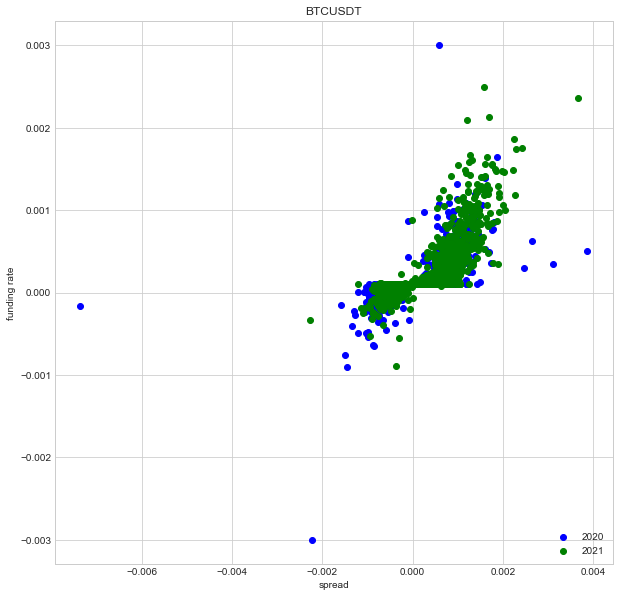

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.scatter(testdata1[testdata1.close_time.apply(lambda x:x[:4])=='2020'].spread,
            testdata1[testdata1.close_time.apply(lambda x:x[:4])=='2020'].fundingRate,
            c ="blue",label='2020')
plt.scatter(testdata1[testdata1.close_time.apply(lambda x:x[:4])=='2021'].spread,
            testdata1[testdata1.close_time.apply(lambda x:x[:4])=='2021'].fundingRate,
            c ="green",label='2021')

plt.title(sym)
plt.legend(loc="lower right")
plt.xlabel("spread")
plt.ylabel("funding rate")
# To show the plot
plt.show()

Text(0.5, 1.0, 'BTCUSDT')

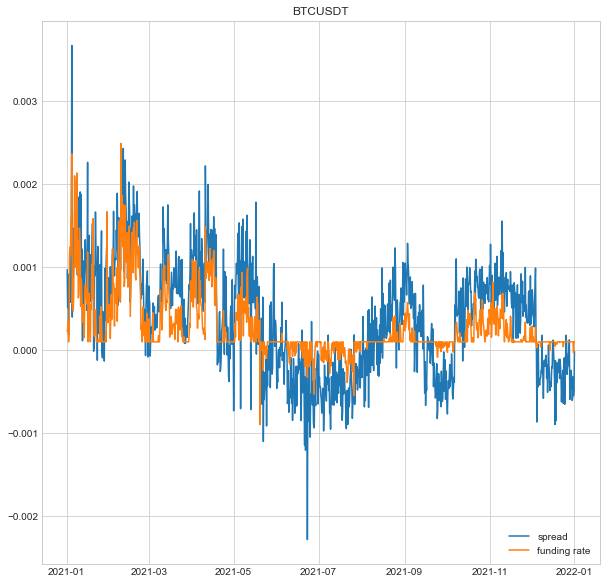

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
x = np.linspace(0, 10, 1000)
ax.plot(testdata1[testdata1.close_time.apply(lambda x:x[:4])=='2021'].close_time.apply(lambda x:datetime.strptime(x[:19],"%Y-%m-%d %H:%M:%S")),
        testdata1[testdata1.close_time.apply(lambda x:x[:4])=='2021'].spread,
       label='spread');
ax.plot(testdata1[testdata1.close_time.apply(lambda x:x[:4])=='2021'].close_time.apply(lambda x:datetime.strptime(x[:19],"%Y-%m-%d %H:%M:%S")),
        testdata1[testdata1.close_time.apply(lambda x:x[:4])=='2021'].fundingRate,
       label='funding rate');
ax.legend(loc="lower right")
plt.title(sym)

Text(0.5, 1.0, 'XMRUSDT')

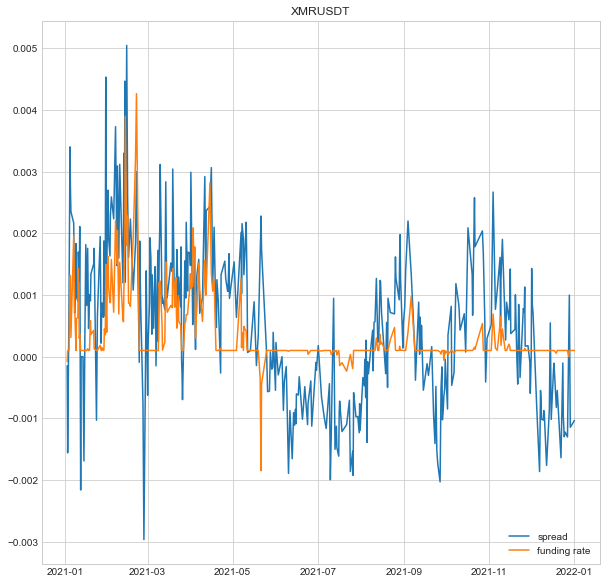

In [723]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
x = np.linspace(0, 10, 1000)
ax.plot(testdata1[testdata1.close_time.apply(lambda x:x[:4])=='2021'].close_time.apply(lambda x:datetime.strptime(x[:19],"%Y-%m-%d %H:%M:%S")),
        testdata1[testdata1.close_time.apply(lambda x:x[:4])=='2021'].spread,
       label='spread');
ax.plot(testdata1[testdata1.close_time.apply(lambda x:x[:4])=='2021'].close_time.apply(lambda x:datetime.strptime(x[:19],"%Y-%m-%d %H:%M:%S")),
        testdata1[testdata1.close_time.apply(lambda x:x[:4])=='2021'].fundingRate,
       label='funding rate');
ax.legend(loc="lower right")
plt.title('XMRUSDT')

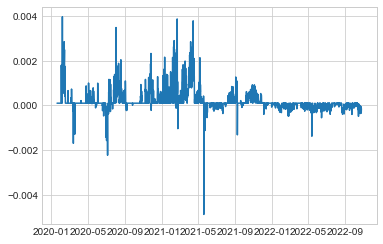

In [144]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, 1000)
ax.plot(funding.fundingTime.apply(lambda x:datetime.strptime(x[:19],"%Y-%m-%d %H:%M:%S")),funding.fundingRate);

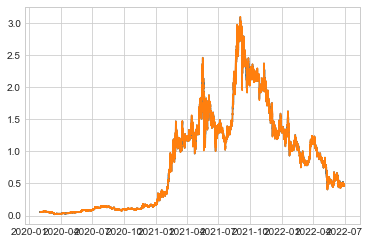

In [147]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, 1000)
ax.plot(testdata.close_time.apply(lambda x:datetime.strptime(x[:19],"%Y-%m-%d %H:%M:%S")),testdata.spot);
ax.plot(testdata.close_time.apply(lambda x:datetime.strptime(x[:19],"%Y-%m-%d %H:%M:%S")),testdata.future);

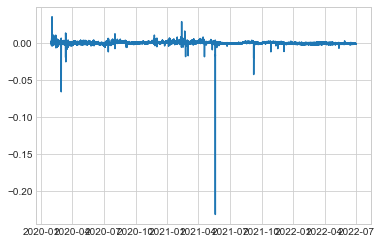

In [152]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, 1000)
ax.plot(testdata.close_time.apply(lambda x:datetime.strptime(x[:19],"%Y-%m-%d %H:%M:%S")),[(j-i)/i for i,j in zip(testdata.spot,testdata.future)]);


In [159]:
# Prophet model for time series forecast
from prophet import Prophet
# Data processing
import numpy as np
import pandas as pd
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Model performance evaluation
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [160]:
testdata_mts = testdata1

In [161]:
testdata_mts

,close_time,future,spot,spread,spot_pct_change,std,MA-TP,BOLU,BOLD,funding_time_next,...,month,day,period,hours,minutes,Unnamed: 0,symbol,fundingTime,fundingRate,fundingTime_t
0,2020-02-03 23:59:59.999,76.68,76.56,0.001567,-0.010725,0.000644,-0.000153,0.001135,-0.001441,2020-02-04 00:00:00.000,...,02,03,202002,23,59,45,XMRUSDT,2020-02-04 00:00:00.000,0.000100,2020-02-04 00:00:00
1,2020-02-04 07:59:59.999,76.72,76.74,-0.000261,-0.001301,0.000590,-0.000182,0.000997,-0.001361,2020-02-04 08:00:00.000,...,02,04,202002,07,59,46,XMRUSDT,2020-02-04 08:00:00.000,0.000100,2020-02-04 08:00:00
2,2020-02-04 15:59:59.999,75.32,75.30,0.000266,-0.002913,0.000511,0.000351,0.001373,-0.000672,2020-02-04 16:00:00.000,...,02,04,202002,15,59,47,XMRUSDT,2020-02-04 16:00:00.001,0.000100,2020-02-04 16:00:00
3,2020-02-04 23:59:59.999,75.08,75.03,0.000666,0.000267,0.000608,0.000725,0.001941,-0.000490,2020-02-05 00:00:00.000,...,02,04,202002,23,59,48,XMRUSDT,2020-02-05 00:00:00.000,0.000100,2020-02-05 00:00:00
4,2020-02-05 07:59:59.999,75.27,75.17,0.001330,0.000000,0.000462,0.000506,0.001429,-0.000418,2020-02-05 08:00:00.000,...,02,05,202002,07,59,49,XMRUSDT,2020-02-05 08:00:00.002,0.000100,2020-02-05 08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2624,2022-06-28 23:59:59.999,118.18,118.40,-0.001858,0.003390,0.000651,-0.001219,0.000082,-0.002521,2022-06-29 00:00:00.000,...,06,28,202206,23,59,537,XMRUSDT,2022-06-29 00:00:00.005,-0.000252,2022-06-29 00:00:00
2625,2022-06-29 07:59:59.999,117.47,117.60,-0.001105,-0.000850,0.000561,-0.001285,-0.000164,-0.002407,2022-06-29 08:00:00.000,...,06,29,202206,07,59,538,XMRUSDT,2022-06-29 08:00:00.000,-0.000144,2022-06-29 08:00:00
2626,2022-06-29 15:59:59.999,118.19,118.30,-0.000930,-0.001688,0.000414,-0.000732,0.000096,-0.001559,2022-06-29 16:00:00.000,...,06,29,202206,15,59,539,XMRUSDT,2022-06-29 16:00:00.013,-0.000024,2022-06-29 16:00:00
2627,2022-06-29 23:59:59.999,121.50,121.60,-0.000822,-0.001642,0.000603,-0.000999,0.000208,-0.002206,2022-06-30 00:00:00.000,...,06,29,202206,23,59,540,XMRUSDT,2022-06-30 00:00:00.000,0.000008,2022-06-30 00:00:00


Text(0.5, 1.0, 'XMRUSDT')

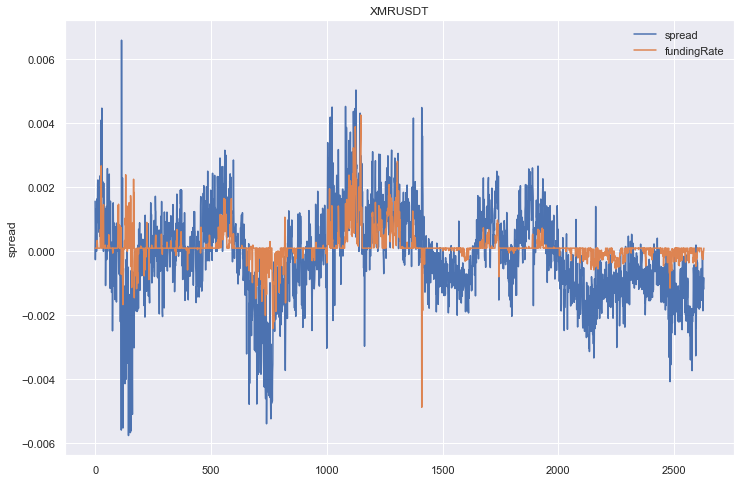

In [162]:
# Visualize data using seaborn
sns.set(rc={'figure.figsize':(12,8)})
sns.lineplot(x=testdata_mts.index, y=testdata_mts['spread'])
sns.lineplot(x=testdata_mts.index, y=testdata_mts['fundingRate'])
plt.legend(['spread', 'fundingRate'])
plt.title(sym)

In [178]:
#train = testdata_mts[testdata_mts['year'] == '2020'][['close_time_t','spread','fundingRate']]
#test = testdata_mts[testdata_mts['year'] == '2021'][['close_time_t','spread','fundingRate']]
train = testdata[testdata['year'] == '2020'][['close_time_t','spread']]
test = testdata[testdata['year'] == '2021'][['close_time_t','spread']]

train.columns = ['ds', 'y']
test.columns = ['ds', 'y']

print(train.shape)
print(test.shape)

(95456, 2)
(104920, 2)


In [179]:
# Use the default hyperparameters to initiate the Prophet model
model_baseline = Prophet()
# Fit the model on the training dataset
model_baseline.fit(train)

16:28:56 - cmdstanpy - INFO - Chain [1] start processing
16:31:20 - cmdstanpy - INFO - Chain [1] done processing


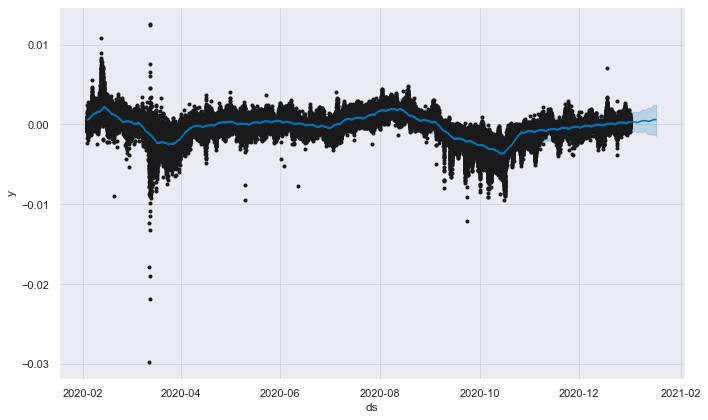

In [180]:
# Create the time range for the forecast
future_baseline = model_baseline.make_future_dataframe(periods=16)
# Make prediction
forecast_baseline = model_baseline.predict(future_baseline)
# Visualize the forecast
model_baseline.plot(forecast_baseline); # Add semi-colon to remove the duplicated chart

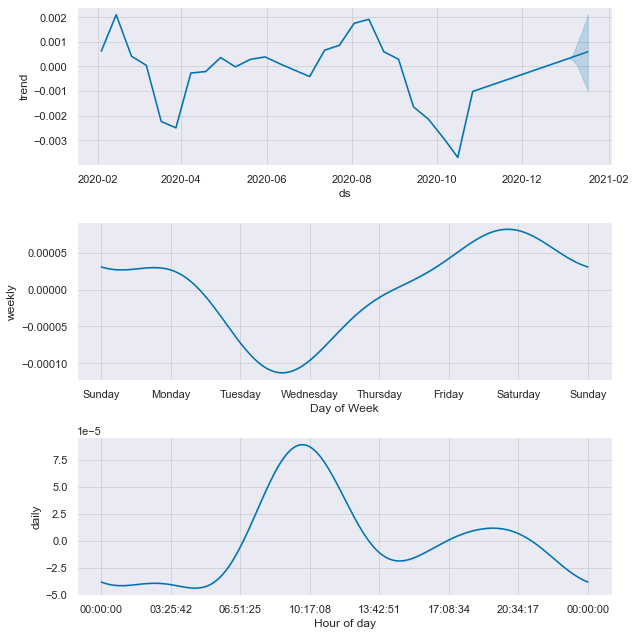

In [181]:
# Visualize the forecast components
model_baseline.plot_components(forecast_baseline);

In [182]:
# Merge actual and predicted values
performance_baseline = pd.merge(test, forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-16:], on='ds')
# Check MAE value
performance_baseline_MAE = mean_absolute_error(performance_baseline['y'], performance_baseline['yhat'])
print(f'The MAE for the baseline model is {performance_baseline_MAE}')
# Check MAPE value
performance_baseline_MAPE = mean_absolute_percentage_error(performance_baseline['y'], performance_baseline['yhat'])
print(f'The MAPE for the baseline model is {performance_baseline_MAPE}')

The MAE for the baseline model is 0.0015371581932550047
The MAPE for the baseline model is 0.9094909376540637


In [183]:
# Add seasonality
model_season = Prophet(yearly_seasonality=True, weekly_seasonality=True)
# Fit the model on the training dataset
model_season.fit(train)

16:34:50 - cmdstanpy - INFO - Chain [1] start processing
16:36:04 - cmdstanpy - INFO - Chain [1] done processing


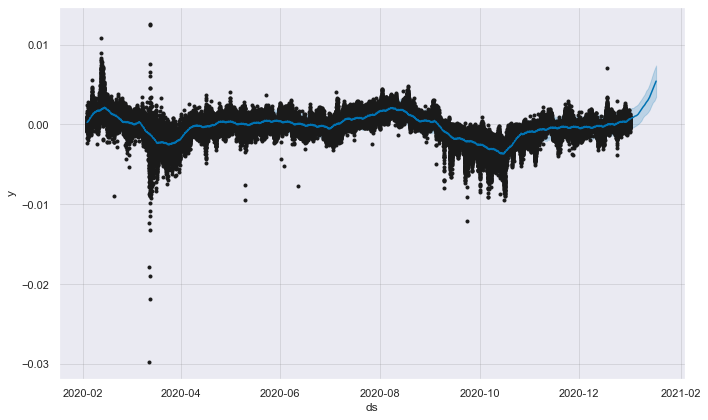

In [184]:
# Create the time range for the forecast
future_season = model_season.make_future_dataframe(periods=16)
# Make prediction
forecast_season = model_season.predict(future_season)
# Visualize the forecast
model_season.plot(forecast_season); # Add semi-colon to remove the duplicated chart

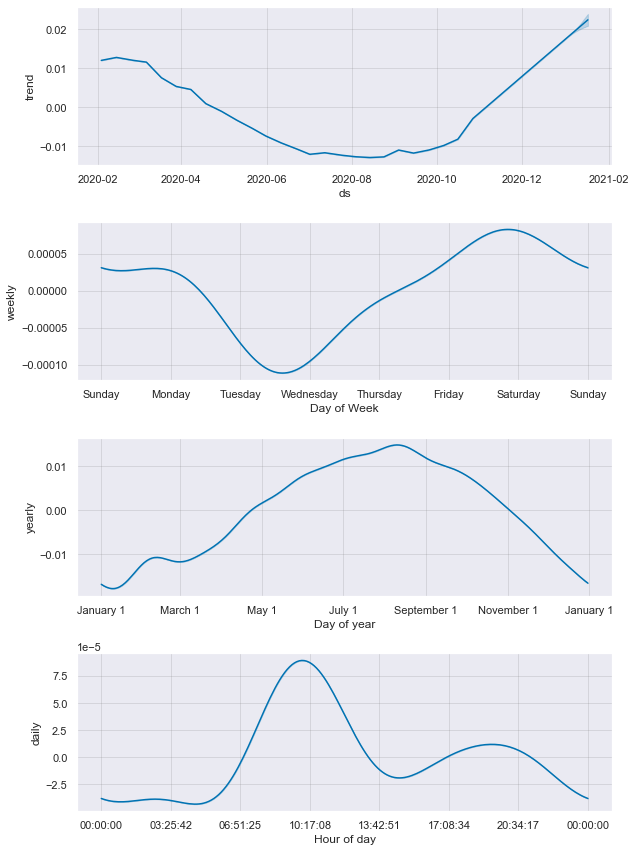

In [185]:
# Visualize the forecast components
model_season.plot_components(forecast_season);

In [186]:
# Merge actual and predicted values
performance_season = pd.merge(test, forecast_season[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-16:], on='ds')
# Check MAE value
performance_season_MAE = mean_absolute_error(performance_season['y'], performance_season['yhat'])
print(f'The MAE for the seasonality model is {performance_season_MAE}')
# Check MAPE value
performance_season_MAPE = mean_absolute_percentage_error(performance_season['y'], performance_season['yhat'])
print(f'The MAPE for the seasonality model is {performance_season_MAPE}')

The MAE for the seasonality model is 0.0023965332114786377
The MAPE for the seasonality model is 3.4695089731625375


In [187]:
# Add seasonality 
model_multivariate = Prophet(yearly_seasonality=True, weekly_seasonality=True)
# Add regressor
model_multivariate.add_regressor('spread', standardize=False)
# Fit the model on the training dataset
model_multivariate.fit(train)

ValueError: Regressor 'spread' missing from dataframe

In [ ]:
# Create the time range for the forecast
future_multivariate = model_multivariate.make_future_dataframe(periods=16)
# Append the regressor values
future_multivariate = pd.merge(future_multivariate, test[['ds', 'spread']], on='ds', how='inner')
# Fill the missing values with the previous value
future_multivariate = future_multivariate.fillna(method='ffill')
# Check the data
future_multivariate.tail(10)

In [ ]:
# Make prediction
forecast_multivariate = model_multivariate.predict(future_multivariate)
# Visualize the forecast
model_multivariate.plot(forecast_multivariate); # Add semi-colon to remove the duplicated chart

In [ ]:
# Visualize the forecast components
model_multivariate.plot_components(forecast_multivariate);

In [ ]:
# Merge actual and predicted values
performance_multivariate = pd.merge(test, forecast_multivariate[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-16:], on='ds')
# Check MAE value
performance_multivariate_MAE = mean_absolute_error(performance_multivariate['y'], performance_multivariate['yhat'])
print(f'The MAE for the multivariate model is {performance_multivariate_MAE}')
# Check MAPE value
performance_multivariate_MAPE = mean_absolute_percentage_error(performance_multivariate['y'], performance_multivariate['yhat'])
print(f'The MAPE for the multivariate model is {performance_multivariate_MAPE}')

# ts

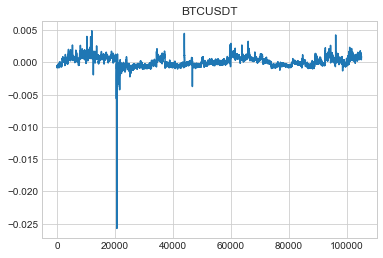

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, 1000)
plt.title(sym)
ax.plot(testdata[testdata.close_time.apply(lambda x:str(x[:4]+x[14:16]))=='202059']['spread']);


In [11]:
print(sym)
testdata.head()

BTCUSDT


,close_time,future,spot,spread,std,MA-TP,BOLU,BOLD
0,2020-01-01 08:04:59.999,7175.25,7179.78,-0.000631,NaN,NaN,NaN,NaN
1,2020-01-01 08:09:59.999,7186.69,7191.07,-0.000609,NaN,NaN,NaN,NaN
2,2020-01-01 08:14:59.999,7176.26,7180.97,-0.000656,NaN,NaN,NaN,NaN
3,2020-01-01 08:19:59.999,7173.68,7178.29,-0.000642,NaN,NaN,NaN,NaN
4,2020-01-01 08:24:59.999,7171.81,7176.96,-0.000718,NaN,NaN,NaN,NaN


In [ ]:
import pmdarima
import arch
returns=testdata[testdata.close_time.apply(lambda x:str(x[:4]+x[14:16]))=='202059']['spread']
# fit ARIMA on returns 
arima_model_fitted = pmdarima.auto_arima(returns)

In [23]:
p, d, q = arima_model_fitted.order
arima_residuals = arima_model_fitted.arima_res_.resid

In [25]:
garch = arch.arch_model(arima_residuals, p=1, q=1)
garch_fitted = garch.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: -60160.986171587785
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -60160.98612000681
            Iterations: 1
            Function evaluations: 5
            Gradient evaluations: 1


C:\Users\ricky\Anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [30]:
# Use ARIMA to predict mu
predicted_mu = arima_model_fitted.predict(n_periods=1)
# Use GARCH to predict the residual
garch_forecast = garch_fitted.forecast(horizon=1)
predicted_et = garch_forecast.mean['h.1'].iloc[-1]
# Combine both models' output: yt = mu + et
prediction = predicted_mu + predicted_et

C:\Users\ricky\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [14]:
from statsmodels.tsa.stattools import adfuller

In [125]:
price_p_value = adfuller(testdata[testdata.close_time.apply(lambda x:str(x[:4]+x[14:16]))=='202059']['spread'])
print(price_p_value)
if price_p_value[1] > 0.05:
    print('Nonstationary')
else:
    print('Stationary')

(-6.380496796215412, 2.228534918319448e-08, 30, 8724, {'1%': -3.431099796556747, '5%': -2.861871360139148, '10%': -2.5669463780359156}, -111040.73231725936)
Stationary


In [126]:
price_p_value = adfuller(testdata[testdata.close_time.apply(lambda x:str(x[:4]+x[14:16]))=='202159']['spread'])
print(price_p_value)
if price_p_value[1] > 0.05:
    print('Nonstationary')
else:
    print('Stationary')

(-3.4560175415270717, 0.00919116946403938, 36, 8706, {'1%': -3.431101347248285, '5%': -2.8618720453548745, '10%': -2.566946742780961}, -114190.12820441557)
Stationary


In [127]:
price_p_value = adfuller(testdata[testdata.close_time.apply(lambda x:str(x[:4]+x[14:16]))=='202259']['spread'])
print(price_p_value)
if price_p_value[1] > 0.05:
    print('Nonstationary')
else:
    print('Stationary')

(-8.827779679699251, 1.803891806330286e-14, 19, 4308, {'1%': -3.4318688488281657, '5%': -2.862211143217297, '10%': -2.567127254420314}, -62341.354370503)
Stationary


In [61]:
testdata['close_time'].apply(lambda x:str(x[:4]+x[11:16]))

0         202008:04
1         202008:09
2         202008:14
3         202008:19
4         202008:24
            ...    
261907    202207:44
261908    202207:49
261909    202207:54
261910    202207:59
261911    202208:04
Name: close_time, Length: 261912, dtype: object

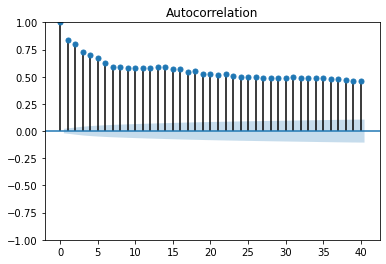

In [123]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(testdata[testdata.close_time.apply(lambda x:str(x[:4]+x[14:16]))=='202059']['spread'])
pyplot.show()

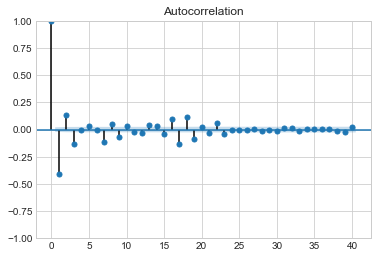

In [231]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(testdata[testdata.close_time.apply(lambda x:str(x[:4]+x[14:16]))=='202059']['spread'].diff().dropna())
pyplot.show()

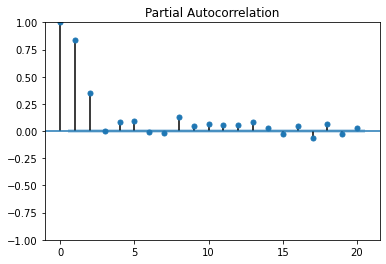

In [124]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(testdata[testdata.close_time.apply(lambda x:str(x[:4]+x[14:16]))=='202059']['spread'], lags=20)
pyplot.show()

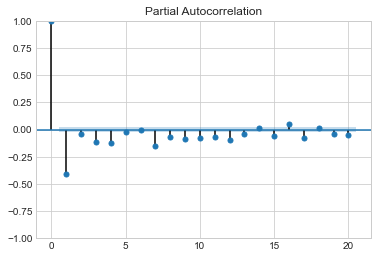

In [232]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(testdata[testdata.close_time.apply(lambda x:str(x[:4]+x[14:16]))=='202059']['spread'].diff().dropna(), lags=20)
pyplot.show()

In [260]:
import pmdarima as pmd
pmd_mdl = pmd.auto_arima(testdata[testdata.close_time.apply(lambda x:str(x[:4]+x[14:16]))=='202059']['spread']
                         ,max_order=30,max_p=20,max_q=20
                        )
pmd_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8755
Model:               SARIMAX(0, 1, 4)   Log Likelihood               55501.865
Date:                Sun, 30 Oct 2022   AIC                        -110993.731
Time:                        00:23:52   BIC                        -110958.344
Sample:                             0   HQIC                       -110981.673
                               - 8755                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4600      0.002   -286.840      0.000      -0.463      -0.457
ma.L2          0.0767      0.001     74.471      0.000       0.075       0.079
ma.L3         -0.2022      0.001   -180.606      0.000      -0.204      -0.200
ma.L4         -0.0240      0.002    -15.066      0.000      -0.027      -0.021
sigma2      1.814e-07   2.51e-10    722.473      0.000    1.81e-07    1.82e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):         198959882.68
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.13   Skew:                            -6.49
Prob(H) (two-sided):                  0.00   Kurtosis:                       741.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [502]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(testdata[testdata.close_time.apply(lambda x:str(x[:4]+x[14:16]))=='202059']['spread'],
              order = (5,1,5))
stats_mdl = model.fit() 
print(stats_mdl.summary())

C:\Users\ricky\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ricky\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ricky\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 spread   No. Observations:                 8755
Model:                 ARIMA(5, 1, 5)   Log Likelihood               54052.378
Date:                Sun, 30 Oct 2022   AIC                        -108082.756
Time:                        10:33:56   BIC                        -108004.906
Sample:                             0   HQIC                       -108056.228
                               - 8755                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3591      0.001   -385.057      0.000      -0.361      -0.357
ar.L2          0.2054      0.002    109.261      0.000       0.202       0.209
ar.L3          0.3392      0.001    543.237      0.0

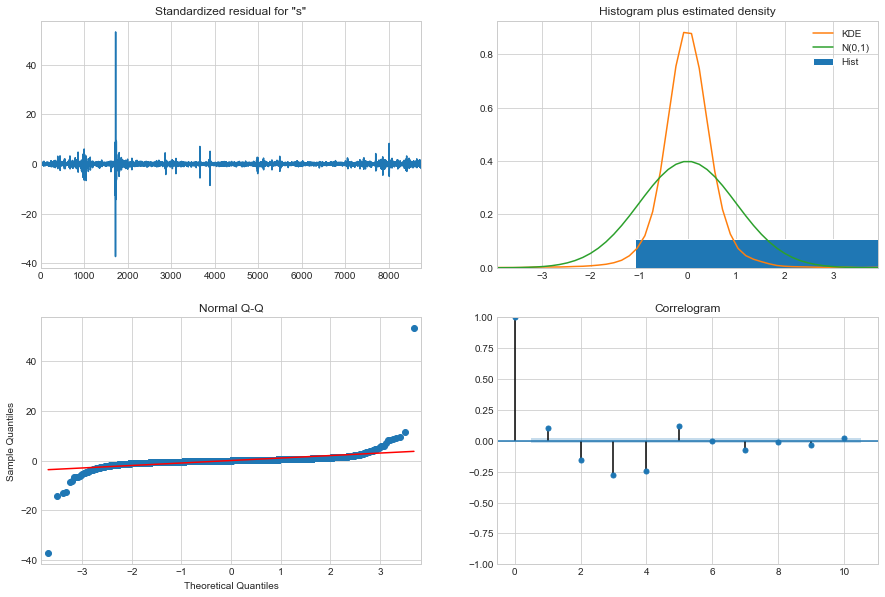

In [504]:
import matplotlib.pyplot as plt
stats_mdl.plot_diagnostics(figsize = (15, 10))
plt.show()

In [505]:
from statsmodels.stats.diagnostic import acorr_ljungbox
white_noise = acorr_ljungbox(stats_mdl.resid, lags = [10], return_df=True)

In [506]:
white_noise

,lb_stat,lb_pvalue
10,1706.92668,0.0


In [507]:
from statsmodels.stats.diagnostic import het_arch
LM_pvalue = het_arch(stats_mdl.resid, ddof = 4)[1]
print('LM-test-Pvalue:', '{:.5f}'.format(LM_pvalue))

LM-test-Pvalue: 0.00000


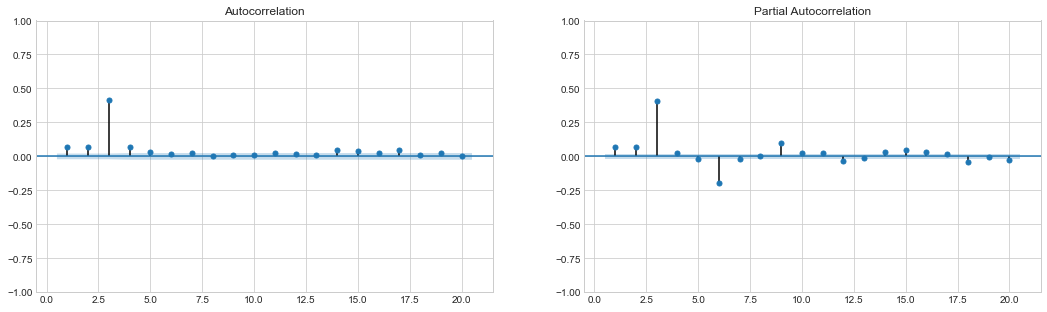

In [508]:

fig, ax = plt.subplots(1, 2, figsize = (18,5))
plot_acf(stats_mdl.resid**2, zero = False, lags = 20, ax=ax[0])
plot_pacf(stats_mdl.resid**2, zero = False, lags = 20, ax=ax[1])
plt.show()

In [509]:
from arch import arch_model
mdl_garch = arch_model(stats_mdl.resid, mean='Zero', vol='EGARCH',dist='skewt', p=7, o=0, q=2)
garch_fit = mdl_garch.fit()
garch_fit.summary()

Iteration:      1,   Func. Count:     13,   Neg. LLF: -9518.146755889156
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -9518.146753166773
            Iterations: 1
            Function evaluations: 13
            Gradient evaluations: 1


C:\Users\ricky\Anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Zero Mean - EGARCH Model Results                            
=========================================================================================
Dep. Variable:                              None   R-squared:                       0.000
Mean Model:                            Zero Mean   Adj. R-squared:                  0.000
Vol Model:                                EGARCH   Log-Likelihood:                9518.15
Distribution:      Standardized Skew Student's t   AIC:                          -19012.3
Method:                       Maximum Likelihood   BIC:                          -18927.4
                                                   No. Observations:                 8755
Date:                           Sun, Oct 30 2022   Df Residuals:                     8755
Time:                                   10:35:45   Df Model:                            0
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega         -5.9767     42.464     -0.141      0.888 [-89.204, 77.250]
alpha[1]       0.0286      0.470  6.079e-02      0.952 [ -0.893,  0.950]
alpha[2]       0.0286      0.406  7.045e-02      0.944 [ -0.766,  0.823]
alpha[3]       0.0286      0.337  8.477e-02      0.932 [ -0.632,  0.689]
alpha[4]       0.0286      0.485  5.893e-02      0.953 [ -0.922,  0.979]
alpha[5]       0.0286      0.168      0.170      0.865 [ -0.300,  0.357]
alpha[6]       0.0286      0.369  7.741e-02      0.938 [ -0.695,  0.752]
alpha[7]       0.0286      0.246      0.116      0.907 [ -0.453,  0.510]
beta[1]        0.4900      1.619      0.303      0.762 [ -2.683,  3.663]
beta[2]        0.4900      1.787      0.274      0.784 [ -3.012,  3.992]
                                 Distribution                                
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
eta            4.0981  4.536e+04  9.035e-05      1.000 [-8.890e+04,8.891e+04]
lambda         0.0000    153.358      0.000      1.000 [-3.006e+02,3.006e+02]
=============================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Inequality constraints incompatible.
See convergence_flag.

"""

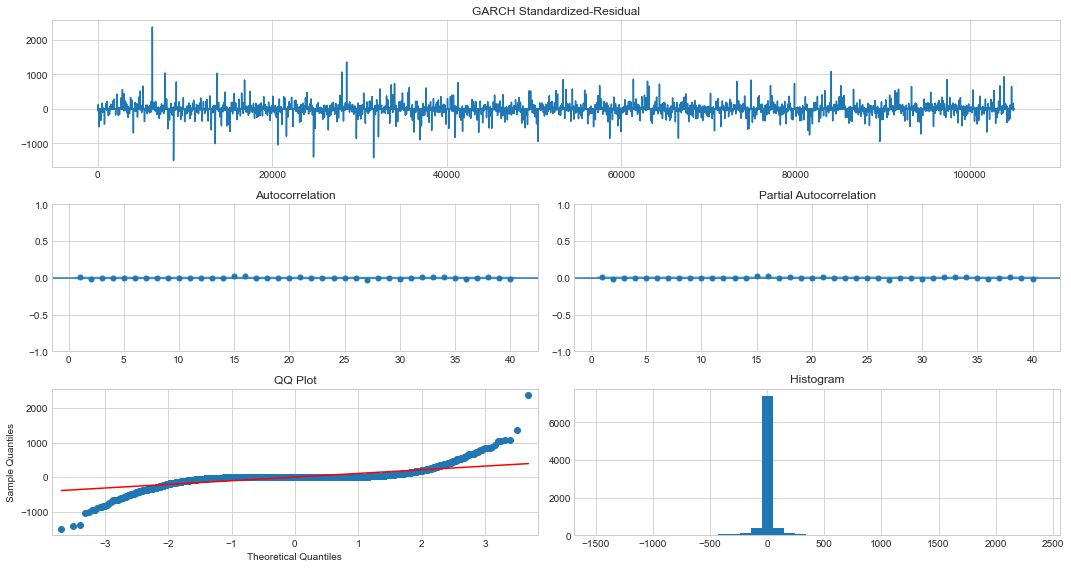

In [510]:
import statsmodels.api as sm

garch_std_resid = pd.Series(garch_fit.resid / garch_fit.conditional_volatility)
fig = plt.figure(figsize = (15, 8))

# Residual
garch_std_resid.plot(ax = fig.add_subplot(3,1,1), title = 'GARCH Standardized-Residual', legend = False)

# ACF/PACF
plot_acf(garch_std_resid, zero = False, lags = 40, ax=fig.add_subplot(3,2,3))
plot_pacf(garch_std_resid, zero = False, lags = 40, ax=fig.add_subplot(3,2,4))

# QQ-Plot & Norm-Dist
sm.qqplot(garch_std_resid, line='s', ax=fig.add_subplot(3,2,5)) 
plt.title("QQ Plot")
fig.add_subplot(3,2,6).hist(garch_std_resid, bins = 40)
plt.title("Histogram")

plt.tight_layout()
plt.show()

In [512]:
white_noise_garch = acorr_ljungbox(garch_std_resid, lags = [10], return_df=True)
white_noise_garch

,lb_stat,lb_pvalue
10,5.290073,0.870978


In [403]:
stats_mdl

In [402]:
garch_fit

                             Zero Mean - EGARCH Model Results                            
Dep. Variable:                              None   R-squared:                       0.000
Mean Model:                            Zero Mean   Adj. R-squared:                  0.000
Vol Model:                                EGARCH   Log-Likelihood:                9065.25
Distribution:      Standardized Skew Student's t   AIC:                          -18106.5
Method:                       Maximum Likelihood   BIC:                          -18021.6
                                                   No. Observations:                 8755
Date:                           Sun, Oct 30 2022   Df Residuals:                     8755
Time:                                   01:09:49   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
----------------------------------

In [404]:
testdata.head()

,close_time,future,spot,spread,spot_pct_change,funding_time_next,close_time5
0,2020-01-01 08:04:59.999,7175.25,7179.78,-0.000631,NaN,2020-01-01 16:00:00.000,2020-01-01 08:05:00.000
1,2020-01-01 08:09:59.999,7186.69,7191.07,-0.000609,0.001572,2020-01-01 16:00:00.000,2020-01-01 08:10:00.000
2,2020-01-01 08:14:59.999,7176.26,7180.97,-0.000656,-0.001405,2020-01-01 16:00:00.000,2020-01-01 08:15:00.000
3,2020-01-01 08:19:59.999,7173.68,7178.29,-0.000642,-0.000373,2020-01-01 16:00:00.000,2020-01-01 08:20:00.000
4,2020-01-01 08:24:59.999,7171.81,7176.96,-0.000718,-0.000185,2020-01-01 16:00:00.000,2020-01-01 08:25:00.000


In [427]:
stats_mdl.forecast()

C:\Users\ricky\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


8755    0.00091
dtype: float64

In [422]:
garch_fit.forecast(horizon=1, reindex=False).variance.values[-1:][0]

array([4.04815386e-09])

In [426]:
testdata[testdata.close_time.apply(lambda x:str(x[14:16]))=='59']

,close_time,future,spot,spread,spot_pct_change,funding_time_next,close_time5
11,2020-01-01 08:59:59.999,7171.55,7177.02,-0.000762,-0.000280,2020-01-01 16:00:00.000,2020-01-01 09:00:00.000
23,2020-01-01 09:59:59.999,7210.24,7216.27,-0.000836,0.000960,2020-01-01 16:00:00.000,2020-01-01 10:00:00.000
35,2020-01-01 10:59:59.999,7237.99,7242.85,-0.000671,-0.000110,2020-01-01 16:00:00.000,2020-01-01 11:00:00.000
47,2020-01-01 11:59:59.999,7221.65,7225.01,-0.000465,-0.000145,2020-01-01 16:00:00.000,2020-01-01 12:00:00.000
59,2020-01-01 12:59:59.999,7213.86,7217.27,-0.000472,-0.000202,2020-01-01 16:00:00.000,2020-01-01 13:00:00.000
...,...,...,...,...,...,...,...
261862,2022-06-30 03:59:59.999,20214.10,20223.63,-0.000471,0.001319,2022-06-30 08:00:00.000,2022-06-30 04:00:00.000
261874,2022-06-30 04:59:59.999,20215.90,20224.04,-0.000402,0.004034,2022-06-30 08:00:00.000,2022-06-30 05:00:00.000
261886,2022-06-30 05:59:59.999,20285.90,20295.35,-0.000466,-0.000147,2022-06-30 08:00:00.000,2022-06-30 06:00:00.000
261898,2022-06-30 06:59:59.999,20204.80,20213.64,-0.000437,-0.000039,2022-06-30 08:00:00.000,2022-06-30 07:00:00.000


AttributeError: 'ARIMA' object has no attribute 'params'

In [458]:
from statsmodels.tsa.arima.model import ARIMA
model2 = ARIMA(testdata[testdata.close_time.apply(lambda x:str(x[14:16]))=='59']['spread'],
              order = (11,1,23))
stats_mdl2 = model2.smooth(stats_mdl.params)

C:\Users\ricky\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ricky\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ricky\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [466]:
arma_pred = stats_mdl2.predict()
arma_pred

11        0.000000
23       -0.000762
35       -0.000806
47       -0.000737
59       -0.000558
            ...   
261862   -0.000325
261874   -0.000498
261886   -0.000395
261898   -0.000413
261910   -0.000507
Name: predicted_mean, Length: 21826, dtype: float64

In [465]:
from arch import arch_model
mdl_garch2 = arch_model(stats_mdl2.resid, mean='Zero', vol='EGARCH',dist='skewt', p=7, o=0, q=2)
garch_fit2 = mdl_garch2.fix(garch_fit.params)
garch_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Zero Mean - EGARCH Model Results                            
=========================================================================================
Dep. Variable:                              None   R-squared:                          --
Mean Model:                            Zero Mean   Adj. R-squared:                     --
Vol Model:                                EGARCH   Log-Likelihood:                21343.9
Distribution:      Standardized Skew Student's t   AIC:                          -42663.7
Method:                User-specified Parameters   BIC:                          -42567.8
                                                   No. Observations:                21826
Date:                           Sun, Oct 30 2022                                         
Time:                                   03:03:16                                         
   Volatility Model  
=====================
                 coef
---------------------
omega         -6.3773
alpha[1]       0.0286
alpha[2]       0.0286
alpha[3]       0.0286
alpha[4]       0.0286
alpha[5]       0.0286
alpha[6]       0.0286
alpha[7]       0.0286
beta[1]        0.4900
beta[2]        0.4900
     Distribution    
=====================
                 coef
---------------------
eta            4.0537
lambda         0.0000
=====================

Results generated with user-specified parameters.
Std. errors not available when the model is not estimated, 
"""

11        0.000011
23        0.000007
35        0.000001
47        0.000002
59        0.000008
            ...   
261862    4.350704
261874    4.647365
261886    4.670865
261898    4.526009
261910    0.169770
Name: cond_vol, Length: 21826, dtype: float64

In [488]:
testdata2 = testdata[testdata.close_time.apply(lambda x:str(x[14:16]))=='59']
testdata2['pred'] = arma_pred
testdata2['predicted_volatility'] = garch_fit2.conditional_volatility.apply(math.sqrt)

In [489]:
testdata2

,close_time,future,spot,spread,spot_pct_change,funding_time_next,close_time5,pred,predicted_volatility
11,2020-01-01 08:59:59.999,7171.55,7177.02,-0.000762,-0.000280,2020-01-01 16:00:00.000,2020-01-01 09:00:00.000,0.000000,0.003272
23,2020-01-01 09:59:59.999,7210.24,7216.27,-0.000836,0.000960,2020-01-01 16:00:00.000,2020-01-01 10:00:00.000,-0.000762,0.002581
35,2020-01-01 10:59:59.999,7237.99,7242.85,-0.000671,-0.000110,2020-01-01 16:00:00.000,2020-01-01 11:00:00.000,-0.000806,0.001180
47,2020-01-01 11:59:59.999,7221.65,7225.01,-0.000465,-0.000145,2020-01-01 16:00:00.000,2020-01-01 12:00:00.000,-0.000737,0.001422
59,2020-01-01 12:59:59.999,7213.86,7217.27,-0.000472,-0.000202,2020-01-01 16:00:00.000,2020-01-01 13:00:00.000,-0.000558,0.002762
...,...,...,...,...,...,...,...,...,...
261862,2022-06-30 03:59:59.999,20214.10,20223.63,-0.000471,0.001319,2022-06-30 08:00:00.000,2022-06-30 04:00:00.000,-0.000325,2.085834
261874,2022-06-30 04:59:59.999,20215.90,20224.04,-0.000402,0.004034,2022-06-30 08:00:00.000,2022-06-30 05:00:00.000,-0.000498,2.155775
261886,2022-06-30 05:59:59.999,20285.90,20295.35,-0.000466,-0.000147,2022-06-30 08:00:00.000,2022-06-30 06:00:00.000,-0.000395,2.161218
261898,2022-06-30 06:59:59.999,20204.80,20213.64,-0.000437,-0.000039,2022-06-30 08:00:00.000,2022-06-30 07:00:00.000,-0.000413,2.127442


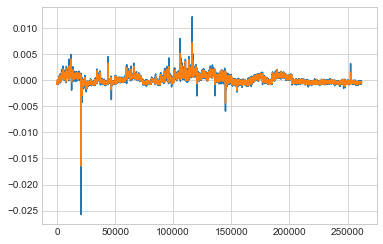

In [493]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, 1000)
ax.plot(testdata2.spread);
ax.plot(testdata2.pred);

# Bollinger Band

In [50]:
sym='BTCUSDT'
n=5
k=2
MA = 'EMA'

In [52]:
spot=df[df['symbol'] == sym][['close_time','close']]
spot.columns=['close_time','spot']
future=df_future[df_future['symbol'] == sym][['close_time','close']]
future.columns=['close_time','future']

funding=df_funding[df_funding['symbol'] == sym] 

testdata = future.merge(spot, on=['close_time'], how='inner')
testdata['spread'] = (testdata['future']-testdata['spot'])/testdata['spot']

testdata['std'] = testdata['spread'].rolling(n).std(ddof=0)
if MA=='SMA':
    testdata['MA-TP'] = testdata['spread'].rolling(n).mean()
elif MA=='EMA':
    testdata['MA-TP'] = testdata['spread'].ewm(span=n, adjust=False).mean()

testdata['BOLU'] = testdata['MA-TP'] + k*testdata['std']
testdata['BOLD'] = testdata['MA-TP'] - k*testdata['std']

In [53]:
testdata

,close_time,future,spot,spread,std,MA-TP,BOLU,BOLD
0,2020-01-01 08:04:59.999,7175.25,7179.78,-0.000631,NaN,-0.000631,NaN,NaN
1,2020-01-01 08:09:59.999,7186.69,7191.07,-0.000609,NaN,-0.000624,NaN,NaN
2,2020-01-01 08:14:59.999,7176.26,7180.97,-0.000656,NaN,-0.000634,NaN,NaN
3,2020-01-01 08:19:59.999,7173.68,7178.29,-0.000642,NaN,-0.000637,NaN,NaN
4,2020-01-01 08:24:59.999,7171.81,7176.96,-0.000718,0.000037,-0.000664,-0.000591,-0.000737
...,...,...,...,...,...,...,...,...
261907,2022-06-30 07:44:59.999,20076.30,20084.13,-0.000390,0.000063,-0.000440,-0.000314,-0.000566
261908,2022-06-30 07:49:59.999,20092.00,20104.68,-0.000631,0.000089,-0.000504,-0.000325,-0.000683
261909,2022-06-30 07:54:59.999,20094.10,20104.78,-0.000531,0.000092,-0.000513,-0.000329,-0.000697
261910,2022-06-30 07:59:59.999,20109.90,20123.01,-0.000651,0.000114,-0.000559,-0.000332,-0.000786


In [54]:
print(testdata.shape)

(261912, 8)


In [55]:
%%time
state = ""
entry_spread = 0.000
exit_spread = -0.000

entry2_spread = -0.000
exit2_spread = 0.000
action=[]
funding_pnl=0
funding_cnt=0
for i in range(testdata.shape[0]):
    # print(dict(testdata.iloc[i]))
    close_time = testdata.iloc[i]['close_time']
    future = testdata.iloc[i]['future']
    spot = testdata.iloc[i]['spot']
    spread = testdata.iloc[i]['spread']
    
    U = testdata.iloc[i]['BOLU']
    L = testdata.iloc[i]['BOLD']
    
    funding_action = funding[funding['fundingTime']==
        datetime.fromtimestamp(datetime.timestamp(datetime.strptime(testdata.iloc[i]['close_time'][:19],"%Y-%m-%d %H:%M:%S"))+1).strftime("%Y-%m-%d %H:%M:%S")+'.000']

    if spread > entry_spread and spread>U and spread>0.002:
        isEntry=True
    else:isEntry=False
    if spread < exit_spread or spread<L:
        isExit=True
    else:isExit=False
        
    if spread < entry2_spread and spread<L and spread<-0.002:
        isEntry2=True
    else:isEntry2=False
    if spread > exit2_spread or spread>U:
        isExit2=True
    else:isExit2=False
        
    # exit position
    if state=="Entry" and isExit:
        state=""
        sellspot=spotEntry*spot-1000000
        exitfuture=(1/futureEntry-1/future)*-1*1000000*spot
        exitSpotFee = 0.00075*sellspot*spot
        exitFutureFee = 0.0004*1000000
        
        action.append(["Exit",close_time,spot,future,spread,
                       sellspot+exitfuture-entrySpotFee-entryFutureFee-exitSpotFee-exitFutureFee + funding_pnl, #
                       funding_cnt,funding_pnl])
        #reset funding pnl when exit
        funding_pnl=0
        funding_cnt=0
        print(action[-1])
    if state=="Entry2" and isExit2:
        state=""
        sellspot=1000000-spotEntry*spot
        exitfuture=(1/futureEntry-1/future)*1000000*spot
        exitSpotFee = 0.00075*sellspot*spot
        exitFutureFee = 0.0004*1000000
        
        action.append(["Exit2",close_time,spot,future,spread, #
                       sellspot+exitfuture-entrySpotFee-entryFutureFee-exitSpotFee-exitFutureFee + funding_pnl,
                       funding_cnt,funding_pnl])
        #reset funding pnl when exit
        funding_pnl=0
        funding_cnt=0
        print(action[-1])
        
    # enter long spot & short future
    if state=="" and isEntry:
        state="Entry"
        spotEntry = 1000000/spot
        futureEntry = future
        entrySpotFee = 0.00075*1000000
        entryFutureFee = 0.0004*1000000
        
        action.append(["Entry",close_time,spot,future,spread,1000000,0,0])
        print(action[-1])
    
    # enter short spot & long future
    if state=="" and isEntry2:
        state="Entry2"
        spotEntry = 1000000/spot
        futureEntry = future
        entrySpotFee = 0.00075*1000000
        entryFutureFee = 0.0004*1000000
        
        action.append(["Entry2",close_time,spot,future,spread,1000000,0,0])
        print(action[-1])
    
    
    
    if state!="":
        if funding_action.shape[0]==1 and state=="Entry":
            funding_cnt+=1
            funding_pnl+=spot * funding_action.iloc[0]['fundingRate'] * spotEntry #mark
            print("funding payment",close_time,funding_action.iloc[0]['fundingRate'],spot * funding_action.iloc[0]['fundingRate'] * spotEntry)
        if funding_action.shape[0]==1 and state=="Entry2":
            funding_cnt+=1
            funding_pnl+=spot * -1 * funding_action.iloc[0]['fundingRate'] * spotEntry #mark
            print("funding payment",close_time,funding_action.iloc[0]['fundingRate'],spot * -1 * funding_action.iloc[0]['fundingRate'] * spotEntry)
    
    #if len(action)==4:break
    
        

['Entry', '2020-01-19 19:44:59.999', 8697.38, 8719.02, 0.002488105613414757, 1000000, 0, 0]
['Exit', '2020-01-19 22:34:59.999', 8642.02, 8650.47, 0.0009777806577627578, -55.919198619709334, 0, 0]
['Entry', '2020-02-09 19:29:59.999', 10115.81, 10140.0, 0.002391306281948802, 1000000, 0, 0]
['Exit', '2020-02-09 23:59:59.999', 10097.1, 10107.0, 0.0009804795436313036, -146.94274322671353, 0, 0]
['Entry', '2020-06-02 09:19:59.999', 10100.0, 10146.84, 0.004637623762376252, 1000000, 0, 0]
['Exit', '2020-06-02 22:54:59.999', 9509.11, 9504.26, -0.0005100372169425281, 3350.324061362373, 0, 0]
['Entry', '2020-08-02 02:44:59.999', 11622.88, 11647.62, 0.0021285602191540823, 1000000, 0, 0]
funding payment 2020-08-02 07:59:59.999 0.00095567 970.3295683944084
funding payment 2020-08-03 07:59:59.999 0.0002585 246.23363357446692
funding payment 2020-08-03 23:59:59.999 0.00043731 428.2608290458132
['Exit', '2020-08-04 14:49:59.999', 11264.6, 11271.57, 0.0006187525522432527, 1558.1378579011691, 3, 1644.824

In [56]:
df_action = pd.DataFrame(action)
df_action.columns=['action','time','spot','future','spread','principle','funding_cnt','funding_pnl']
df_action.head()

df_action.to_csv('action_'+sym+'_n'+str(n)+'_k'+str(k)+'_'+MA+'.csv')



In [67]:
df_action=pd.read_csv('action_'+sym+'_n'+str(n)+'_k'+str(k)+'_'+MA+'.csv')
#df_action = df_action[:-1]
hold_time = [(l2[0][2][:4],l2[1][2][:4],datetime.strptime(l2[1][2][:19],"%Y-%m-%d %H:%M:%S") - datetime.strptime(l2[0][2][:19],"%Y-%m-%d %H:%M:%S"),l2[1][1]) for l2 in [df_action.values.tolist()[i:i+2] for i in range(0, df_action.shape[0], 2)]]
#hold_time

print(sym,2020)
print('number of enter:',len([l[6]-1000000 for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2020']))
print('PNL',100*sum([l[6] for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2020'])/1000000)
print('win%',len([1 for l in df_action.values.tolist() if l[6]>0 and (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2020'])/len([1 for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2020']))
print('PNLfunding',100*sum([l[8] for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2020'])/1000000)
print('avg_cnt_funding',statistics.fmean([l[7] for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2020']))
print('avg_hold_hours',statistics.fmean([l[2].total_seconds() for l in hold_time if l[1]=='2020' and (l[3]=="Exit" or l[3]=="Exit2")])/60/60)

print("")
print(sym,2021)
print('number of enter:',len([l[6]-1000000 for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2021']))
print('PNL',100*sum([l[6] for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2021'])/1000000)
print('win%',len([1 for l in df_action.values.tolist() if l[6]>0 and (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2021'])/len([1 for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2021']))
print('PNLfunding',100*sum([l[8] for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2021'])/1000000)
print('avg_cnt_funding',statistics.fmean([l[7] for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2021']))
print('avg_hold_hours',statistics.fmean([l[2].total_seconds() for l in hold_time if l[1]=='2021' and (l[3]=="Exit" or l[3]=="Exit2")])/60/60)

print("")
print(sym,2022)
print('number of enter:',len([l[6]-1000000 for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2022']))
print('PNL',100*sum([l[6] for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2022'])/1000000)
print('win%',len([1 for l in df_action.values.tolist() if l[6]>0 and (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2022'])/len([1 for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2022']))
print('PNLfunding',100*sum([l[8] for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2022'])/1000000)
print('avg_cnt_funding',statistics.fmean([l[7] for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2022']))
print('avg_hold_hours',statistics.fmean([l[2].total_seconds() for l in hold_time if l[1]=='2022' and (l[3]=="Exit" or l[3]=="Exit2")])/60/60)



BTCUSDT 2020
number of enter: 5
PNL 1.1140701614638764
win% 0.6
PNLfunding 0.6152190311451746
avg_cnt_funding 4.6
avg_hold_hours 63.56666666666667

BTCUSDT 2021
number of enter: 5
PNL 0.5420920615684812
win% 0.8
PNLfunding 0.5604387097733419
avg_cnt_funding 0.8
avg_hold_hours 19.916666666666668

BTCUSDT 2022
number of enter: 0
PNL 0.0


ZeroDivisionError: division by zero

In [41]:
df_action

,Unnamed: 0,action,time,spot,future,spread,principle,funding_cnt,funding_pnl
0,0,Entry2,2020-01-10 21:09:59.999,7874.69,7871.06,-0.000461,1000000.000000,0,0.000000
1,1,Exit2,2020-01-10 22:19:59.999,7932.05,7933.48,0.000180,-899.745738,0,0.000000
2,2,Entry,2020-01-17 08:44:59.999,8692.72,8698.91,0.000712,1000000.000000,0,0.000000
3,3,Exit,2020-01-20 07:14:59.999,8674.97,8674.94,-0.000003,1760.723962,6,2595.603875
4,4,Entry,2020-01-23 08:24:59.999,8662.23,8666.01,0.000436,1000000.000000,0,0.000000
...,...,...,...,...,...,...,...,...,...
398,398,Entry2,2022-06-04 05:29:59.999,29740.01,29722.00,-0.000606,1000000.000000,0,0.000000
399,399,Exit2,2022-06-07 04:14:59.999,31333.30,31334.00,0.000022,-1111.637120,4,-262.569050
400,400,Entry2,2022-06-19 10:59:59.999,18380.10,18367.80,-0.000669,1000000.000000,0,0.000000
401,401,Exit2,2022-06-24 03:09:59.999,20536.99,20570.30,0.001622,936.503266,4,30.933361


In [ ]:
for sym in ["BTCUSDT","ETHUSDT","XMRUSDT","BCHUSDT","ADAUSDT","BNBUSDT","SOLUSDT","DOTUSDT"]:
    for n in [20,30,50,100]:
        for k in [1,1.25,1.5,2,2.25,2.5,3]:
            for MA in ['EMA','SMA']:
                
                spot=df[df['symbol'] == sym][['close_time','close']]
                spot.columns=['close_time','spot']
                future=df_future[df_future['symbol'] == sym][['close_time','close']]
                future.columns=['close_time','future']

                funding=df_funding[df_funding['symbol'] == sym] 

                testdata = future.merge(spot, on=['close_time'], how='inner')
                testdata['spread'] = (testdata['future']-testdata['spot'])/testdata['spot']

                testdata['std'] = testdata['spread'].rolling(n).std(ddof=0)
                if MA=='SMA':
                    testdata['MA-TP'] = testdata['spread'].rolling(n).mean()
                elif MA=='EMA':
                    testdata['MA-TP'] = testdata['spread'].ewm(span=n, adjust=False).mean()

                testdata['BOLU'] = testdata['MA-TP'] + k*testdata['std']
                testdata['BOLD'] = testdata['MA-TP'] - k*testdata['std']

                state = ""
                entry_spread = 0.000
                exit_spread = -0.000

                entry2_spread = -0.000
                exit2_spread = 0.000
                action=[]
                funding_pnl=0
                funding_cnt=0
                for i in range(testdata.shape[0]):
                    # print(dict(testdata.iloc[i]))
                    close_time = testdata.iloc[i]['close_time']
                    future = testdata.iloc[i]['future']
                    spot = testdata.iloc[i]['spot']
                    spread = testdata.iloc[i]['spread']

                    U = testdata.iloc[i]['BOLU']
                    L = testdata.iloc[i]['BOLD']

                    funding_action = funding[funding['fundingTime']==
                        datetime.fromtimestamp(datetime.timestamp(datetime.strptime(testdata.iloc[i]['close_time'][:19],"%Y-%m-%d %H:%M:%S"))+1).strftime("%Y-%m-%d %H:%M:%S")+'.000']

                    if spread > entry_spread and spread>U and spread>0.002:
                        isEntry=True
                    else:isEntry=False
                    if spread < exit_spread:
                        isExit=True
                    else:isExit=False

                    if spread < entry2_spread and spread<L and spread<-0.002:
                        isEntry2=True
                    else:isEntry2=False
                    if spread > exit2_spread:
                        isExit2=True
                    else:isExit2=False

                    # exit position
                    if state=="Entry" and isExit:
                        state=""
                        sellspot=spotEntry*spot-1000000
                        exitfuture=(1/futureEntry-1/future)*-1*1000000*spot
                        exitSpotFee = 0.00075*spotEntry*spot
                        exitFutureFee = 0.0004*1000000

                        action.append(["Exit",close_time,spot,future,spread,
                                       sellspot+exitfuture-entrySpotFee-entryFutureFee-exitSpotFee-exitFutureFee + funding_pnl, #
                                       funding_cnt,funding_pnl])
                        #reset funding pnl when exit
                        funding_pnl=0
                        funding_cnt=0
                        print(action[-1])
                    if state=="Entry2" and isExit2:
                        state=""
                        sellspot=1000000-spotEntry*spot
                        exitfuture=(1/futureEntry-1/future)*1000000*spot
                        exitSpotFee = 0.00075*spotEntry*spot
                        exitFutureFee = 0.0004*1000000

                        action.append(["Exit2",close_time,spot,future,spread, #
                                       sellspot+exitfuture-entrySpotFee-entryFutureFee-exitSpotFee-exitFutureFee + funding_pnl,
                                       funding_cnt,funding_pnl])
                        #reset funding pnl when exit
                        funding_pnl=0
                        funding_cnt=0
                        print(action[-1])

                    # enter long spot & short future
                    if state=="" and isEntry:
                        state="Entry"
                        spotEntry = 1000000/spot
                        futureEntry = future
                        entrySpotFee = 0.00075*1000000
                        entryFutureFee = 0.0004*1000000

                        action.append(["Entry",close_time,spot,future,spread,1000000,0,0])
                        print(action[-1])

                    # enter short spot & long future
                    if state=="" and isEntry2:
                        state="Entry2"
                        spotEntry = 1000000/spot
                        futureEntry = future
                        entrySpotFee = 0.00075*1000000
                        entryFutureFee = 0.0004*1000000

                        action.append(["Entry2",close_time,spot,future,spread,1000000,0,0])
                        print(action[-1])



                    if state!="":
                        if funding_action.shape[0]==1 and state=="Entry":
                            funding_cnt+=1
                            funding_pnl+=spot * funding_action.iloc[0]['fundingRate'] * spotEntry #mark
                            print("funding payment",close_time,funding_action.iloc[0]['fundingRate'],spot * funding_action.iloc[0]['fundingRate'] * spotEntry)
                        if funding_action.shape[0]==1 and state=="Entry2":
                            funding_cnt+=1
                            funding_pnl+=spot * -1 * funding_action.iloc[0]['fundingRate'] * spotEntry #mark
                            print("funding payment",close_time,funding_action.iloc[0]['fundingRate'],spot * -1 * funding_action.iloc[0]['fundingRate'] * spotEntry)

                    #if len(action)==4:break
                df_action = pd.DataFrame(action)
                df_action.columns=['action','time','spot','future','spread','principle','funding_cnt','funding_pnl']
                df_action.head()

                df_action.to_csv('action_'+sym+'_n'+str(n)+'_k'+str(k)+'_'+MA+'.csv')



In [10]:
results = []
for sym in ["BTCUSDT","ETHUSDT","XMRUSDT","BCHUSDT","ADAUSDT","BNBUSDT","SOLUSDT","DOTUSDT"]:
    for n in [20,30,50,100]:
        for k in [1,1.25,1.5,2,2.25,2.5,3]:
            for MA in ['EMA','SMA']:


                df_action=pd.read_csv('action_'+sym+'_n'+str(n)+'_k'+str(k)+'_'+MA+'.csv')
                if (df_action.shape[0]%2)==1:
                    df_action = df_action[:-1]
                hold_time = [(l2[0][2][:4],l2[1][2][:4],datetime.strptime(l2[1][2][:19],"%Y-%m-%d %H:%M:%S") - datetime.strptime(l2[0][2][:19],"%Y-%m-%d %H:%M:%S"),l2[1][1]) for l2 in [df_action.values.tolist()[i:i+2] for i in range(0, df_action.shape[0], 2)]]
                #hold_time
                
                if df_action[df_action.time.apply(lambda x:x[:4]=='2020')].shape[0]>0:
                    datum=[]
                    datum.append(sym)
                    datum.append(n)
                    datum.append(k)
                    datum.append(MA)
                    datum.append(2020)
                    datum.append(len([l[6]-1000000 for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2020']))
                    datum.append(100*sum([l[6] for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2020'])/1000000)
                    datum.append(len([1 for l in df_action.values.tolist() if l[6]>0 and (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2020'])/len([1 for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2020']))
                    datum.append(100*sum([l[8] for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2020'])/1000000)
                    datum.append(statistics.fmean([l[7] for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2020']))
                    datum.append(statistics.fmean([l[2].total_seconds() for l in hold_time if l[1]=='2020' and (l[3]=="Exit" or l[3]=="Exit2")])/60/60)
                    results.append(datum)
                
                if df_action[df_action.time.apply(lambda x:x[:4]=='2021')].shape[0]>0:
                    datum=[]
                    datum.append(sym)
                    datum.append(n)
                    datum.append(k)
                    datum.append(MA)
                    datum.append(2021)
                    datum.append(len([l[6]-1000000 for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2021']))
                    datum.append(100*sum([l[6] for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2021'])/1000000)
                    datum.append(len([1 for l in df_action.values.tolist() if l[6]>0 and (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2021'])/len([1 for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2021']))
                    datum.append(100*sum([l[8] for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2021'])/1000000)
                    datum.append(statistics.fmean([l[7] for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2021']))
                    datum.append(statistics.fmean([l[2].total_seconds() for l in hold_time if l[1]=='2021' and (l[3]=="Exit" or l[3]=="Exit2")])/60/60)
                    results.append(datum)
                
                if df_action[df_action.time.apply(lambda x:x[:4]=='2022')].shape[0]>0:
                    datum=[]
                    datum.append(sym)
                    datum.append(n)
                    datum.append(k)
                    datum.append(MA)
                    datum.append(2022)
                    datum.append(len([l[6]-1000000 for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2022']))
                    datum.append(100*sum([l[6] for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2022'])/1000000)
                    datum.append(len([1 for l in df_action.values.tolist() if l[6]>0 and (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2022'])/len([1 for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2022']))
                    datum.append(100*sum([l[8] for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2022'])/1000000)
                    datum.append(statistics.fmean([l[7] for l in df_action.values.tolist() if (l[1]=="Exit" or l[1]=="Exit2") and l[2][:4]=='2022']))
                    datum.append(statistics.fmean([l[2].total_seconds() for l in hold_time if l[1]=='2022' and (l[3]=="Exit" or l[3]=="Exit2")])/60/60)
                    results.append(datum)






In [11]:
results1 = pd.DataFrame(results)
results1.columns=['sym','n','k','MA','year','number_of_enter','PNL','winpercent','PNLfunding','avg_cnt_funding','avg_hold_hours']
results1.to_csv("BollingerBandResults.csv")

In [75]:
11%2

1